![Capstone_Notebook_Banner.png](capstone_notebook_banner.png)

## <font color=maroon><center> Filtering and Cleaning the Data (Sprint 3)</center></font>
##### <font color=brown><center>BrainStation Bootcamp (12 September to 1 December 2023)</center></font>

*Capstone Project,     
Deadline: 30 November 2023   
Author: Reema Sipra*

---

##  <font color=maroon>Table of Contents</font><a id = "taboc"></a>

1. **[Introduction](#Intro)**
2. **[Notebook Environment](#NotebookEnv)**
3. **[Dataset Source](#DataSource)** 
    - [Dataset Dictionary](#datasetdictionary)
4. **[Consolidated data for Analysis](#ConsolidatedData)**
    - [A. Initial Filtering of the Dataset](#filteringdataset)
    - [B. Further filtering and cleaning of the Dataset](#filtereddataset)
        - [B.1. DataFrame Data Dictionary](#filtereddataset)
        - [B.2. Further filtering and cleaning of the Dataset](#filtereddataset)
    - [C. Setup DataFrame with all the years](#addyears)
    - [D. Filter the 'institutional_df' to include only 4-year bachelor degrees](#onlybachelors)
    - [E. Adjusting Data Types of the Columns and handling missing values](#columndtypes)
        - [E.1. REGION column](#region)
        - [E.2. CONTROL column](#control)
        - [E.3. Number of Title IV students in public, private, program-year](#numstudents)
        - [E.4. Discontinued Columns](#discontinuedcols)
        - [E.5. Other Columns except Latitude, Longitude, and Target](#other)
        - [E.6. Latitude and Longitude](#latlon)
        - [E.7. Target variable: Earnings columns](#earnings)
        - [E.8. Summary](#summary)
    - [F. Standardize Format](#format)
    - [G. Validate and Verify cleaned DataFrame](#validatedata)
5. **[Nice to haves for next iteration](#NextSteps)**
6. **[References](#ReferenceList)**

---

##  <font color=maroon>Introduction</font><a id = "Intro"></a>

One of the biggest decision points for students and their parents is picking a suitable university and career. People spend considerable resources to pick and get into the right university. With increasing educational costs and facing an increasingly competitive job market after graduation, making an informed decision is even more crtical for prospective students and their families.

The key to making an informed decision is relevant data that is presented in a useful manner. There is a wealth of information provided by govrenmental institutions and universities that can be analyzed through machine learning models to support such desicion making. Leveraging techniques such as time series analysis through AutoRegressive (AR) models and Convolutional Neural Networks (CNN), this project aims to provide a nuanced understanding of the complex interplay between these variables and future financial success.

Furthermore, these models have the potential to also support university with their strategies by enabling them to tailor their programs to better align with the financial expectations of students and enhance overall educational outcomes. It can also support diversification of the student body.

**Project Objectives:**
The objectives of the project have been updated to the following since Sprint-1:
- Support decision making of high school students & parents.
- Create a reliable model for students to estimate earnings for given program and university.

**Notebook (Sprint-2) Objectives:**
The objectives of this notebook are to:
- Create a dataframe with the necessary features for a bottom-up modelling approach.
- Setup the data for modelling.
- Perform preliminary EDA on the dataframe.

**Highlevel methodology**:
This will entail time series modelling of the projected earning based on selected key features. The key features will be determined through EDA and modelling iteratively through a bottom-up approach. For advanced modelling, Convolutional Nueral Networks can be considered as they are also used for time series analysis.

**Important notes on work progression** since *Initial Data Exploration (Sprint 1):*

Like any real world project, for this Capstone project there are updates, modifications, and revisits to the drawing board as the understanding of the problem space has grown. This is common in the early-stages of a project. It is important to front-load project modifications in the initial or conceptual stage of the project to clarify the scope and approah where the impact on the cost with respect to time and resources is considerably less compared to later stages (e.g. modelling, evaluation, deployment phases). The key modifications since Sprint-1:

1. **Title, Intent, and objective of the project**: The original intent was to predict enrollment of students into universities and this has been changed to a time series analysis of projected earnings e.g. for a given program / university etc combination.
2. **Methodology, EDA & modelling approach**: Originally models such as logistic regression, random forest, and neural networks were considered. Based on the changes in objectives, the approach has been altered in line with the 'Highlevel methodlogy' outlined earlier.
3. **Update of the Initial Data Exploration (sprint-1) notebook** inline with updates to the project.

[Back to the top](#taboc)

## <font color=maroon>Notebook Environtment</font><a id = "NotebookEnv"></a>

This project utilizes the "RIS_capstone_env" environment package created specifically for this project. Please refer to the *Requirements* file for details.

[Back to the top](#taboc)

## <font color=maroon>Dataset Source</font><a id = "DataSource"></a>

**Data Source:** 
US Department of Education, College Scorecard [[1]](#Ref1)

**College Scorecard:** An online tool created by the US government to allow users to compare the cost and value of higher institutional learning. Includes data on Title IV Universities (receive federal funding to make tuition affordable).

Initiated by President Obama to: " be able to see how much each school's graduates earn, how much debt they graduate with, and what percentage of a school's students can pay back their loans." 

**Three main components:** 
 - Institutional level data: (6543 universities, 15 categories, 3232 columns) over 26 years (across 26 csv files).
 - Fields of study at the universities (233,979 study areas, 160 columns) over 6 years (across 5 csv files).
 - Crosswalks:  map of differing institutional data defintion between university and the federal government (25004 records, 21 columns) over 20 years.



#### Dataset Dictionary:<a id = "datasetdictionary"></a>

The dataset provided by College Score contains a wealth and abundance of well documented information of more than 6000 universities with 3000 columns. The following resources utilized together provide a good understanding of the dataset:
- A detailed glossary of terms can be found [here](https://surveys.nces.ed.gov/ipeds/public/glossary) [[2]](#Ref2).
- An excel file of the full dataset dictonary can be found [here](#https://collegescorecard.ed.gov/data/documentation/) [[3]](#Ref3).
- A data frame for the data dictionary of the institutional data was created for this project using the `yaml` file, included with the dataset [[1]](#Ref1). The data frame will be imported here from the `Initial Dataset Exploration` notebook and can be used to look up column information based on the `Column_id` from the institutional data frame from within this notebook.

In [1]:
# Retrieving the stored dataframe:
%store -r institution_column_data

In [2]:
# Check import was ok:
institution_column_data.set_index('Column_id', inplace=True)
institution_column_data.head(5)

,Category_level_1,Category_level_2,Category_level_3,column_description
Column_id,,,,
PCIP01,academics,program_percentage,agriculture,"Percentage of degrees awarded in Agriculture, ..."
PCIP03,academics,program_percentage,resources,Percentage of degrees awarded in Natural Resou...
PCIP04,academics,program_percentage,architecture,Percentage of degrees awarded in Architecture ...
PCIP05,academics,program_percentage,ethnic_cultural_gender,"Percentage of degrees awarded in Area, Ethnic,..."
PCIP09,academics,program_percentage,communication,Percentage of degrees awarded in Communication...


In [181]:
# RUN THIS CELL WHEN YOU WANT TO LOOK UP THE DEFINITION OF A COLUMN NAME FROM THE DATAFRAME:

# Interactively search the `institutional_column_data` using this cell:

# Get the user input
search_name = input("Enter a column_id from the institutional dataset to search: ")

# Convert user input to match the case of the DataFrame index
search_name = search_name.upper()  

# Search the DataFrame based on user input
if search_name in institution_column_data.index:
    result = institution_column_data.loc[[search_name]]
    print(f"\nResult for {search_name}:\n{result}")
else:
    print(f"\nNo match found for {search_name}")

Enter a column_id from the institutional dataset to search:  INSTNM



Result for INSTNM:
          Category_level_1 Category_level_2 Category_level_3  \
Column_id                                                      
INSTNM              school             name             None   

          column_description  
Column_id                     
INSTNM      Institution name  


[Back to the top](#taboc)

## <font color=maroon>Consolidated data for Analysis</font><a id = "ReferenceList"></a>

#### A. Initial Filtering of the dataset: <a id = "filteringdataset"></a>

1. **Number of Universities:** The dataset is quite extensive and includes 2-3 colleges and diploma /degree institutions along with institutions with 4-year and higher programs. The focus of this study is bachelor and graduate degrees. As such only institutions providing a highest degree (`HIGHDEG`) as bachelors or graduate degrees.

2. **Relevant to predict future earnings** Initially for the baseline this will be done as follows:

The main objective is to be able to use timeseries to make a prediction of the anticipated income a graduating student can expect once graduating from one of the title IV university within the United States (US).

[Back to the top](#taboc)

#### B. Further Filtering and Cleaning of the Dataset: <a id = "filtereddataset"></a>

<!DOCTYPE html>
<html>
<head>
<style>
<a id = "dfdatadictionary"></a>    
table {
  font-family: Arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

th, td {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

th {
  background-color: #f2f2f2;
}
</style>
</head>
<body>

<h3>B.1. Data frame Data Dictionary</h3>

<table>
  <tr>
    <th>Column</th>
    <th>Description</th>
    <th>Data Type</th>
  </tr>
  <tr>
    <td>UNITID</td>
    <td>Unit ID for institution</td>
    <td>Int</td>
  </tr>
  <tr>
    <td>INSTNM</td>
    <td>Institution name</td>
    <td>String</td>
  </tr>
   <tr>
    <td>Year</td>
    <td>Academic Year the data was recorded</td>
    <td>Int</td>
  </tr>
    <tr>
    <td>LONGITUDE</td>
    <td>Longitude of institution</td>
    <td>Float</td>
  </tr>
    <tr>
    <td>LATITUDE</td>
    <td>Latitude of institution</td>
    <td>Float</td>
  </tr>
    <tr>
    <td>REGION</td>
    <td>The Region of the institution. There are 10 main classes: 
        0 = U.S. Service Schools;
        1 = New England (CT, ME, MA, NH, RI, VT);
        2 = Mid East (DE, DC, MD, NJ, NY, PA);
        3 = Great Lakes (IL, IN, MI, OH, WI);
        4 = Plains (IA, KS, MN, MO, NE, ND, SD);
        5 = Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV);
        6 = Southwest (AZ, NM, OK, TX);
        7 = Rocky Mountains (CO, ID, MT, UT, WY);
        8 = Far West (AK, CA, HI, NV, OR, WA);
        9 = Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI).</td>
    <td>float</td>
  </tr>
     <tr>
    <td>CONTROL</td>
    <td>Type, ie. Control of institution (IPEDS). 
        1 = Public;
        2 = Private nonprofit;
        3 = Private for-profit.</td>
    <td>Tinyint</td>
  </tr>
     <tr>
    <td>HIGHDEG</td>
    <td>Highest degree awarded by institution.
        0 = Non-degree-granting;
        1 = Certificate degree;
        2 = Associate degree;
        3 = Bachelor's degree;
        4 = Graduate degree.</td>
    <td>Int</td>
  </tr>
    <tr>
    <td>NUM4_PUB</td>
    <td>Number of Title IV students (public institutions)</td>
    <td>Int</td>
  </tr>
    <tr>
    <td>NUM4_PRIV</td>
    <td>Number of Title IV students (private for-profit and nonprofit institutions)</td>
    <td>Int</td>
  </tr>
    <tr>
    <td>UGDS</td>
    <td>Enrollment of undergraduate certificate/degree-seeking students</td>
    <td>Int</td>
  </tr>
    <tr>
    <td>UG</td>
    <td>Enrollment of all undergraduate students</td>
    <td>Int</td>
  </tr>
    <tr>
    <td>ADM_RATE</td>
    <td>Admission rate</td>
    <td>Float</td>
  </tr>
    <tr>
    <td>SAT_AVG</td>
    <td>Average SAT equivalent score of students admitted</td>
    <td>Float</td>
  </tr>
     <tr>
    <td>SATVR25</td>
    <td>25th percentile of SAT scores at the institution (critical reading)</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>SATMT25</td>
    <td>25th percentile of SAT scores at the institution (math)</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>SATWR25</td>
    <td>25th percentile of SAT scores at the institution (writing)</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>SATVR75</td>
    <td>75th percentile of SAT scores at the institution (critical reading)</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>SATMT75</td>
    <td>75th percentile of SAT scores at the institution (math)</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>SATWR75</td>
    <td>75th percentile of SAT scores at the institution (writing)</td>
    <td>Float</td>
    <tr>
    <td>SATVRMID</td>
    <td>Midpoint of SAT scores at the institution (critical reading)</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>SATMTMID</td>
    <td>Midpoint of SAT scores at the institution (math)</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>SATWRMID</td>
    <td>Midpoint of SAT scores at the institution (writing)</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>ACTCM25</td>
    <td>25th percentile of ACT scores at the institution (cumulative)</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>ACTEN25</td>
    <td>25th percentile of ACT scores at the institution (english)</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>ACTMT25</td>
    <td>25th percentile of ACT scores at the institution (math)</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>ACTWR25</td>
    <td>25th percentile of ACT scores at the institution (writing)</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>ACTCM75</td>
    <td>75th percentile of ACT scores at the institution (cumulative)</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>ACTEN75</td>
    <td>75th percentile of ACT scores at the institution (english)</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>ACTMT75</td>
    <td>75th percentile of ACT scores at the institution (math)</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>ACTWR75</td>
    <td>75th percentile of ACT scores at the institution (writing)</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>ACTCMMID</td>
    <td>Midpoint of ACT scores at the institution (cumulative)</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>ACTENMID</td>
    <td>Midpoint of ACT scores at the institution (english)</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>ACTMTMID</td>
    <td>Midpoint of ACT scores at the institution (math)</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>ACTWRMID</td>
    <td>Midpoint of ACT scores at the institution (writing)</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP01</td>
    <td>Percentage of degrees awarded in Agriculture, Agriculture Operations, And Related Sciences.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP03</td>
    <td>Percentage of degrees awarded in Natural Resources And Conservation.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP04</td>
    <td>Percentage of degrees awarded in Architecture And Related Services.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP05</td>
    <td>Percentage of degrees awarded in Area, Ethnic, Cultural, Gender, And Group Studies.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP09</td>
    <td>Percentage of degrees awarded in Communication, Journalism, And Related Programs.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP10</td>
    <td>Percentage of degrees awarded in Communications Technologies/Technicians And Support Services.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP11</td>
    <td>Percentage of degrees awarded in Computer And Information Sciences And Support Services.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP12</td>
    <td>Percentage of degrees awarded in Personal And Culinary Services.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP13</td>
    <td>Percentage of degrees awarded in Education.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP14</td>
    <td>Percentage of degrees awarded in Engineering.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP15</td>
    <td>Percentage of degrees awarded in Engineering Technologies And Engineering-Related Fields.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP16</td>
    <td>Percentage of degrees awarded in Foreign Languages, Literatures, And Linguistics.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP19</td>
    <td>Percentage of degrees awarded in Family And Consumer Sciences/Human Sciences.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP22</td>
    <td>Percentage of degrees awarded in Legal Professions And Studies.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP23</td>
    <td>Percentage of degrees awarded in English Language And Literature/Letters.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP24</td>
    <td>Percentage of degrees awarded in Liberal Arts And Sciences, General Studies And Humanities.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP25</td>
    <td>Percentage of degrees awarded in Library Science.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP26</td>
    <td>Percentage of degrees awarded in Biological And Biomedical Sciences.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP27</td>
    <td>Percentage of degrees awarded in Mathematics And Statistics.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP29</td>
    <td>Percentage of degrees awarded in Military Technologies And Applied Sciences.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP30</td>
    <td>Percentage of degrees awarded in Multi/Interdisciplinary Studies.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP31</td>
    <td>Percentage of degrees awarded in Parks, Recreation, Leisure, And Fitness Studies.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP38</td>
    <td>Percentage of degrees awarded in Philosophy And Religious Studies.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP39</td>
    <td>Percentage of degrees awarded in Theology And Religious Vocations.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP40</td>
    <td>Percentage of degrees awarded in Physical Sciences.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP41</td>
    <td>Percentage of degrees awarded in Science Technologies/Technicians.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP42</td>
    <td>Percentage of degrees awarded in Psychology.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP43</td>
    <td>Percentage of degrees awarded in Homeland Security, Law Enforcement, Firefighting And Related Protective Services.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP44</td>
    <td>Percentage of degrees awarded in Public Administration And Social Service Professions.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP45</td>
    <td>Percentage of degrees awarded in Social Sciences.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP46</td>
    <td>Percentage of degrees awarded in Construction Trades.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP47</td>
    <td>Percentage of degrees awarded in Mechanic And Repair Technologies/Technicians.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP48</td>
    <td>Percentage of degrees awarded in Precision Production.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP49</td>
    <td>Percentage of degrees awarded in Transportation And Materials Moving.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP50</td>
    <td>Percentage of degrees awarded in Visual And Performing Arts.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP51</td>
    <td>Percentage of degrees awarded in Health Professions And Related Programs.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP52</td>
    <td>Percentage of degrees awarded in Business, Management, Marketing, And Related Support Services.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCIP54</td>
    <td>Percentage of degrees awarded in History.</td>
    <td>Float</td>
    </tr>
     <tr>
    <td>CIP01BACHL</td>
    <td>Bachelor's degree in Agriculture, Agriculture Operations, And Related Sciences.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP03BACHL</td>
    <td>Bachelor's degree in Natural Resources And Conservation.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP04BACHL</td>
    <td>Bachelor's degree in Architecture And Related Services.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP05BACHL</td>
    <td>Bachelor's degree in Area, Ethnic, Cultural, Gender, And Group Studies.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP09BACHL</td>
    <td>Bachelor's degree in Communication, Journalism, And Related Programs.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP10BACHL</td>
    <td>Bachelor's degree in Communications Technologies/Technicians And Support Services.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP11BACHL</td>
    <td>Bachelor's degree in Computer And Information Sciences And Support Services.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP12BACHL</td>
    <td>Bachelor's degree in Personal And Culinary Services.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP13BACHL</td>
    <td>Bachelor's degree in in Education.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP14BACHL</td>
    <td>Bachelor's degree in Engineering.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP15BACHL</td>
    <td>Bachelor's degree in Engineering Technologies And Engineering-Related Fields.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP16BACHL</td>
    <td>Bachelor's degree in Foreign Languages, Literatures, And Linguistics.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP19BACHL</td>
    <td>Bachelor's degree in Family And Consumer Sciences/Human Sciences.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP22BACHL</td>
    <td>Bachelor's degree in Legal Professions And Studies.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP23BACHL</td>
    <td>Bachelor's degree in English Language And Literature/Letters.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP24BACHL</td>
    <td>Bachelor's degree in Liberal Arts And Sciences, General Studies And Humanities.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP25BACHL</td>
    <td>Bachelor's degree in Library Science.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP26BACHL</td>
    <td>Bachelor's degree in Biological And Biomedical Sciences.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP27BACHL</td>
    <td>Bachelor's degree in Mathematics And Statistics.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP29BACHL</td>
    <td>Bachelor's degree in Military Technologies And Applied Sciences.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP30BACHL</td>
    <td>Bachelor's degree in Multi/Interdisciplinary Studies.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP31BACHL</td>
    <td>Bachelor's degree in Parks, Recreation, Leisure, And Fitness Studies.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP38BACHL</td>
    <td>Bachelor's degree in Philosophy And Religious Studies.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP39BACHL</td>
    <td>Bachelor's degree in Theology And Religious Vocations.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP40BACHL</td>
    <td>Bachelor's degree in Physical Sciences.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP41BACHL</td>
    <td>Bachelor's degree in Science Technologies/Technicians.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP42BACHL</td>
    <td>Bachelor's degree in Psychology.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP43BACHL</td>
    <td>Bachelor's degree in Homeland Security, Law Enforcement, Firefighting And Related Protective Services.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP44BACHL</td>
    <td>Bachelor's degree in Public Administration And Social Service Professions.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP45BACHL</td>
    <td>Bachelor's degree in Social Sciences.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP46BACHL</td>
    <td>Bachelor's degree in Construction Trades.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP47BACHL</td>
    <td>Bachelor's degree in Mechanic And Repair Technologies/Technicians.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP48BACHL</td>
    <td>Bachelor's degree in Precision Production.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP49BACHL</td>
    <td>Bachelor's degree in Transportation And Materials Moving.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP50BACHL</td>
    <td>Percentage of degrees awarded in Visual And Performing Arts.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP51BACHL</td>
    <td>Bachelor's degree in Health Professions And Related Programs.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP52BACHL</td>
    <td>Bachelor's degree in Business, Management, Marketing, And Related Support Services..</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>CIP54BACHL</td>
    <td>Bachelor's degree in History.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>NPT4_PUB</td>
    <td>Average net price for Title IV institutions (public institutions)</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>NPT4_PRIV</td>
    <td>Average net price for Title IV institutions (private for-profit and nonprofit institutions)     </td>
    <td>Int</td>
    </tr>
    <tr>
    <td>PCTPELL</td>
    <td>Percentage of undergraduates who receive a Pell Grant</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PCTFLOAN</td>
    <td>Percent of all undergraduate students receiving a federal student loan.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>GRAD_DEBT_MDN</td>
    <td>The median debt for students who have completed</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PELL_DEBT_MDN</td>
    <td>The median debt for Pell students.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>LOAN_EVER</td>
    <td>Share of students who received a federal loan while in school.</td>
    <td>Float</td>
    </tr>
    <tr>
    <td>PELL_EVER</td>
    <td>Share of students who received a Pell Grant while in school</td>
    <td>Float</td>
    </tr>
     <tr>
    <td>COUNT_WNE_P10</td>
    <td> Number of students working and not enrolled 10 years after entry.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>COUNT_NWNE_P10</td>
    <td> Number of students not working and not enrolled 10 years after entry.</td>
    <td>Int</td>
    </tr>
    <tr>
</table>
</body>
</html>

<!DOCTYPE html>
<html>
<head>
<style>
    <a id = "filteredtarget"></a>
table {
  font-family: Arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

th, td {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

th {
  background-color: #f2f2f2;
}
</style>
</head>
<body>

<h3>B.2. Filtered Data Dictionary: Target Variables</h3>

<table>
  <tr>
    <th>Column</th>
    <th>Description</th>
    <th>Data Type</th>
  </tr>
  <tr>
    <td>MD_EARN_WNE_P10</td>
    <td>Median earnings of students working and not enrolled 10 years after entry</td>
    <td>Int</td>
  </tr>
    <tr>
    <td>PCT25_EARN_WNE_P10</td>
    <td>25th percentile of earnings of students working and not enrolled 10 years after entry.</td>
    <td>Int</td>
    </tr>
    <tr>
    <td>PCT75_EARN_WNE_P10</td>
    <td>75th percentile of earnings of students working and not enrolled 10 years after entry.</td>
    <td>Int</td>
    </tr>
</table>
</body>
</html>

[Back to the top](#taboc)

#### C. Setup dataframe with all the years  <a id = "addyears"></a>

In [4]:
# Import the libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import re
import os
from sklearn.impute import SimpleImputer, KNNImputer
import warnings
warnings.filterwarnings("ignore")

First lets combine all the institual data across the years into a new dataframe. While each csv file is appended, add a new column providing the year.

In [5]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Create a consolidated instutituional dataframe

# Path to the institutional data csv files
csv_directory = './data'

# Initialize an empty list to store DataFrames
dataframes = []

# Iterate through each CSV file in the directory
for filename in os.listdir(csv_directory):
    if filename.endswith('.csv') and filename.startswith('MERGED'):
        # Construct the full file path
        file_path = os.path.join(csv_directory, filename)
        
        # Extract the year from the filename (assuming the year is part of the filename)
        year_part = filename.split('MERGED')[1].split('_')[0]  # Extract the part after 'MERGED' and before the underscore
        year = int(year_part)  # Convert the extracted part to an integer
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Add a new column 'Year' with the corresponding year
        df['Year'] = year
        
        # Append the current DataFrame to the list
        dataframes.append(df)
        
        # Combine all DataFrames in the list into one DataFrame
        combined_data = pd.concat(dataframes, ignore_index=True)

In [ ]:
import pandas as pd
import pickle

# Pickle the DataFrame to a file
with open('combined_data.pkl', 'wb') as file:
    pickle.dump(combined_data, file)

In [6]:
import pandas as pd
import pickle
# Retrieve the DataFrame from the pickle file
with open('combined_data.pkl', 'rb') as file:
    combined_data = pickle.load(file)

# Display the retrieved DataFrame
print(combined_data.head())

   UNITID    OPEID   OPEID6                               INSTNM        CITY  \
0  100654   100200   1002.0             Alabama A & M University      Normal   
1  100663   105200   1052.0  University of Alabama at Birmingham  Birmingham   
2  100690  2503400  25034.0                   Amridge University  Montgomery   
3  100706   105500   1055.0  University of Alabama in Huntsville  Huntsville   
4  100724   100500   1005.0             Alabama State University  Montgomery   

  STABBR         ZIP ACCREDAGENCY INSTURL NPCURL  ...  \
0     AL       35762          NaN     NaN    NaN  ...   
1     AL  35294-0110          NaN     NaN    NaN  ...   
2     AL  36117-3553          NaN     NaN    NaN  ...   
3     AL       35899          NaN     NaN    NaN  ...   
4     AL  36104-0271          NaN     NaN    NaN  ...   

   OMENRUP_NOPELL_FIRSTTIME  OMENRYP_NOPELL_NOTFIRSTTIME  \
0                       NaN                          NaN   
1                       NaN                          NaN

*(Note: output of cell above collapsed to improve overall readability).*

In [7]:
combined_data.tail()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMENRUP_NOPELL_FIRSTTIME,OMENRYP_NOPELL_NOTFIRSTTIME,OMENRAP_NOPELL_NOTFIRSTTIME,OMAWDP8_NOPELL_NOTFIRSTTIME,OMENRUP_NOPELL_NOTFIRSTTIME,OMACHT8_NOPELL_ALL,OMACHT8_NOPELL_FIRSTTIME,OMACHT8_NOPELL_NOTFIRSTTIME,ADDR,Year
183245,45896402,145954,1459.0,Strayer University-Charleston Campus,North Charleston,SC,29403,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
183246,45897301,145990,1459.0,Strayer University-Irving,Irving,TX,75063,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
183247,45897302,145992,1459.0,Strayer University-Katy,Houston,TX,77079,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
183248,45897303,145994,1459.0,Strayer University-Northwest Houston,Houston,TX,77064-5768,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
183249,45897304,145995,1459.0,Strayer University-Plano,Plano,TX,75093,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010


In [8]:
# Sanity check to make sure that all the years were appended.
sorted(combined_data['Year'].unique())

[1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

Now we need to first filter only the necessary columns to make the data more manageable for the first iteration of analysis. Since a bottom-up approach was adopted, other features can be included in further iterations for optimization.

In [9]:
# Create a list of the columns that we want to keep from the data frame:

column_list = ['UNITID','INSTNM','Year','LONGITUDE','LATITUDE','REGION','CONTROL','HIGHDEG',
               'NUM4_PUB','NUM4_PRIV','NUM4_PROG','UGDS','UG','ADM_RATE','SAT_AVG','SATVR25',
               'SATMT25','SATWR25','SATVR75','SATMT75','SATWR75','SATVRMID','SATMTMID','SATWRMID',
               'ACTCM25','ACTEN25','ACTMT25','ACTWR25','ACTCM75','ACTEN75','ACTMT75','ACTWR75',
               'ACTCMMID','ACTENMID','ACTMTMID','ACTWRMID','PCIP01','PCIP03','PCIP04','PCIP05','PCIP09',
               'PCIP10','PCIP11','PCIP12','PCIP13','PCIP14','PCIP15','PCIP16','PCIP19','PCIP22','PCIP23',
               'PCIP24','PCIP25','PCIP26','PCIP27','PCIP29','PCIP30','PCIP31','PCIP38','PCIP39','PCIP40',
               'PCIP41','PCIP42','PCIP43','PCIP44','PCIP45','PCIP46','PCIP47','PCIP48','PCIP49','PCIP50',
               'PCIP51','PCIP52','PCIP54','CIP01BACHL','CIP03BACHL','CIP04BACHL','CIP05BACHL','CIP09BACHL',
               'CIP10BACHL','CIP11BACHL','CIP12BACHL','CIP13BACHL','CIP14BACHL','CIP15BACHL','CIP16BACHL',
               'CIP19BACHL','CIP22BACHL','CIP23BACHL','CIP24BACHL','CIP25BACHL','CIP26BACHL','CIP27BACHL',
               'CIP29BACHL','CIP30BACHL','CIP31BACHL','CIP38BACHL','CIP39BACHL','CIP40BACHL','CIP41BACHL',
               'CIP42BACHL','CIP43BACHL','CIP44BACHL','CIP45BACHL','CIP46BACHL','CIP47BACHL','CIP48BACHL',
               'CIP49BACHL','CIP50BACHL','CIP51BACHL','CIP52BACHL','CIP54BACHL','NPT4_PUB', 'NPT4_PRIV',
               'NPT4_PROG','PCTPELL','PCTFLOAN','GRAD_DEBT_MDN','PELL_DEBT_MDN','LOAN_EVER','PELL_EVER',
               'COUNT_NWNE_P10','COUNT_WNE_P10','MN_EARN_WNE_P10','MD_EARN_WNE_P10','PCT10_EARN_WNE_P10',
               'PCT25_EARN_WNE_P10','PCT75_EARN_WNE_P10','PCT90_EARN_WNE_P10','SD_EARN_WNE_P10']


In [10]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

# Create a new dataframe using the column list:
institutional_df = combined_data[column_list].copy()
institutional_df.head()

,UNITID,INSTNM,Year,LONGITUDE,LATITUDE,REGION,CONTROL,HIGHDEG,NUM4_PUB,NUM4_PRIV,NUM4_PROG,UGDS,UG,ADM_RATE,SAT_AVG,SATVR25,SATMT25,SATWR25,SATVR75,SATMT75,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTEN25,ACTMT25,ACTWR25,ACTCM75,ACTEN75,ACTMT75,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,CIP01BACHL,CIP03BACHL,CIP04BACHL,CIP05BACHL,CIP09BACHL,CIP10BACHL,CIP11BACHL,CIP12BACHL,CIP13BACHL,CIP14BACHL,CIP15BACHL,CIP16BACHL,CIP19BACHL,CIP22BACHL,CIP23BACHL,CIP24BACHL,CIP25BACHL,CIP26BACHL,CIP27BACHL,CIP29BACHL,CIP30BACHL,CIP31BACHL,CIP38BACHL,CIP39BACHL,CIP40BACHL,CIP41BACHL,CIP42BACHL,CIP43BACHL,CIP44BACHL,CIP45BACHL,CIP46BACHL,CIP47BACHL,CIP48BACHL,CIP49BACHL,CIP50BACHL,CIP51BACHL,CIP52BACHL,CIP54BACHL,NPT4_PUB,NPT4_PRIV,NPT4_PROG,PCTPELL,PCTFLOAN,GRAD_DEBT_MDN,PELL_DEBT_MDN,LOAN_EVER,PELL_EVER,COUNT_NWNE_P10,COUNT_WNE_P10,MN_EARN_WNE_P10,MD_EARN_WNE_P10,PCT10_EARN_WNE_P10,PCT25_EARN_WNE_P10,PCT75_EARN_WNE_P10,PCT90_EARN_WNE_P10,SD_EARN_WNE_P10
0,100654,Alabama A & M University,2011,NaN,NaN,5.0,1.0,4,644.0,NaN,NaN,4112.0,NaN,0.5010,846.0,370.0,360.0,370.0,450.0,450.0,440.0,410.0,405.0,405.0,16.0,14.0,15.0,NaN,19.0,19.0,18.0,NaN,18.0,17.0,17.0,NaN,0.0388,0.0145,0.0129,0.000,0.0000,0.0517,0.0258,0.0,0.1438,0.0856,0.0404,0.0000,0.0291,0.0,0.0162,0.0210,0.0,0.0985,0.0162,0.0,0.0,0.0000,0.0000,0.0000,0.0226,0.0,0.0630,0.0000,0.0646,0.0485,0.0,0.0,0.0,0.0,0.0162,0.0000,0.1906,0.0000,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,8734.0,NaN,NaN,0.6933,0.7903,26499,12092,0.9479553903,0.8756712102,214,1532,35300,31400,6700,16800,47000,70000,27800
1,100663,University of Alabama at Birmingham,2011,NaN,NaN,5.0,1.0,4,907.0,NaN,NaN,10854.0,NaN,0.7223,1107.0,500.0,500.0,NaN,630.0,640.0,NaN,565.0,570.0,NaN,21.0,21.0,20.0,NaN,27.0,28.0,26.0,NaN,24.0,25.0,23.0,NaN,0.0000,0.0000,0.0000,0.002,0.0427,0.0000,0.0139,0.0,0.0780,0.0551,0.0000,0.0124,0.0000,0.0,0.0223,0.0060,0.0,0.0819,0.0094,0.0,0.0,0.0000,0.0154,0.0000,0.0184,0.0,0.0641,0.0323,0.0149,0.0447,0.0,0.0,0.0,0.0,0.0417,0.2334,0.1822,0.0293,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,15013.0,NaN,NaN,0.3381,0.5355,17000,11500,0.9120045515,0.63967381,365,2661,46300,40300,10900,24900,57900,84000,41900
2,100690,Amridge University,2011,NaN,NaN,5.0,2.0,4,NaN,2.0,NaN,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0198,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.6931,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.2178,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0693,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,4422.0,NaN,0.6506,0.7415,17740.5,6033,0.9389920424,0.8859416446,46,170,42100,38100,6800,20800,56100,79500,30500
3,100706,University of Alabama in Huntsville,2011,NaN,NaN,5.0,1.0,4,303.0,NaN,NaN,5755.0,NaN,0.6368,1164.0,500.0,520.0,NaN,630.0,670.0,NaN,565.0,595.0,NaN,22.0,22.0,21.0,NaN,29.0,30.0,28.0,NaN,26.0,26.0,25.0,NaN,0.0000,0.0000,0.0000,0.000,0.0224,0.0000,0.0292,0.0,0.0214,0.2471,0.0000,0.0224,0.0000,0.0,0.0204,0.0000,0.0,0.0652,0.0146,0.0,0.0,0.0000,0.0117,0.0000,0.0311,0.0,0.0331,0.0000,0.0000,0.0175,0.0,0.0,0.0,0.0,0.0360,0.1819,0.2325,0.0136,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,9677.0,NaN,NaN,0.3176,0.4779,20000,12750,0.8982905983,0.6717948718,178,1135,52700,46

In [11]:
institutional_df.shape

(183250, 130)

[Back to the top](#taboc)

#### D. Filter the 'institutional_df' to include only 4-year bachelor degrees:<a id = "onlybachelors"></a>

In [12]:
institutional_df['HIGHDEG'].isnull().any()

False

In [13]:
Highest_is_Bachelors=institutional_df.loc[institutional_df['HIGHDEG']==3]

In [14]:
# filter to consider degree programs 

# First filter institutions where the highest degree offered is bachelors or graduate
# i.e. `HIGHDEG` == 3 or ==4.

highestDeg_Bachelors_or_Grad=institutional_df.loc[(institutional_df['HIGHDEG']==3) | (institutional_df['HIGHDEG']==4)]
highestDeg_Bachelors_or_Grad.shape

(69258, 130)

In [15]:
# we can further filter this by selecting rows where the sum(CIP01BACHL:CIP54BACHL) !=0.
institutional_df = highestDeg_Bachelors_or_Grad.loc[
    (highestDeg_Bachelors_or_Grad.loc[:, 'CIP01BACHL':'CIP54BACHL'].sum(axis=1) != 0)
]

In [16]:
institutional_df.shape

(60839, 130)

This dataframe has considerably fewer columns. The rows can now be filtered to make sure only undergraduate degrees are looked at.

[Back to the top](#taboc)

#### E. Adjusting Data Types of the Columns:<a id = "columndtypes"></a>
Let's double check the datatypes of the columns.

In [17]:
for column, dtype in institutional_df.dtypes.items():
    print(f"{column}: {dtype}")

UNITID: int64
INSTNM: object
Year: int64
LONGITUDE: float64
LATITUDE: float64
REGION: float64
CONTROL: float64
HIGHDEG: int64
NUM4_PUB: float64
NUM4_PRIV: float64
NUM4_PROG: float64
UGDS: float64
UG: float64
ADM_RATE: float64
SAT_AVG: float64
SATVR25: float64
SATMT25: float64
SATWR25: float64
SATVR75: float64
SATMT75: float64
SATWR75: float64
SATVRMID: float64
SATMTMID: float64
SATWRMID: float64
ACTCM25: float64
ACTEN25: float64
ACTMT25: float64
ACTWR25: float64
ACTCM75: float64
ACTEN75: float64
ACTMT75: float64
ACTWR75: float64
ACTCMMID: float64
ACTENMID: float64
ACTMTMID: float64
ACTWRMID: float64
PCIP01: float64
PCIP03: float64
PCIP04: float64
PCIP05: float64
PCIP09: float64
PCIP10: float64
PCIP11: float64
PCIP12: float64
PCIP13: float64
PCIP14: float64
PCIP15: float64
PCIP16: float64
PCIP19: float64
PCIP22: float64
PCIP23: float64
PCIP24: float64
PCIP25: float64
PCIP26: float64
PCIP27: float64
PCIP29: float64
PCIP30: float64
PCIP31: float64
PCIP38: float64
PCIP39: float64
PCIP40: f

institutional_df.shape**Observations**:
- `Region` and `Control` can be int types (as per data dictionary)
- `HIGHDEG`, `NUM4_PUB`, `NUM4_PRIV`,`NUM4_PROG`, `UGDS`,`UG`  can be int types (as per data dictionary)
- Institutions are either public or private. Therefore if one of the columns, `NUM4_PRIV` or `NUM4_PUB` (number of students in private vs. public), is filled the other is empty (NaN). In this case, we can replace the NaNs with a dummy value e.g. (-9999) to help the model understand.



In [18]:
institutional_df.shape

(60839, 130)

[Back to the top](#taboc)

**E.1.`REGION` column**:<a id = "region"></a>

In [19]:
# For Region - have a look at the values
institutional_df['REGION'].value_counts().sort_values

<bound method Series.sort_values of REGION
5.0    14431
2.0    10699
3.0     9021
8.0     7237
4.0     6376
6.0     4829
1.0     4531
7.0     2070
9.0     1514
0.0      131
Name: count, dtype: int64>

In [20]:
# Checking for NaNs before changing the data type.
institutional_df['REGION'].isna().sum()

0

In [21]:
# convert to 'int' type:
institutional_df['REGION']=institutional_df['REGION'].astype(int)
# sanity check:
institutional_df['REGION'].dtype

dtype('int64')

[Back to the top](#taboc)

**E.2.`Control` column**: (float to int) - same process as `REGION`
<a id = "control"></a>

In [22]:
# Have a look at the values
institutional_df['CONTROL'].value_counts().sort_values

<bound method Series.sort_values of CONTROL
2.0    34808
1.0    16985
3.0     9046
Name: count, dtype: int64>

In [23]:
# Checking for NaNs before changing the data type.
institutional_df['CONTROL'].isna().sum()

0

In [24]:
# Reset the index
institutional_df = institutional_df.reset_index(drop=True)

# Replace NaN with a dummy value (-9999 in this case)
dummy_value=-9999
institutional_df['CONTROL'].fillna(dummy_value, inplace=True)  

# Convert 'CONTROL' column to int type
institutional_df['CONTROL'] = institutional_df['CONTROL'].astype(int)

type(institutional_df)

pandas.core.frame.DataFrame

Let's check the datatypes of the remaining columns again: 

In [25]:
for column, dtype in institutional_df.dtypes.items():
    print(f"{column}: {dtype}")

UNITID: int64
INSTNM: object
Year: int64
LONGITUDE: float64
LATITUDE: float64
REGION: int64
CONTROL: int64
HIGHDEG: int64
NUM4_PUB: float64
NUM4_PRIV: float64
NUM4_PROG: float64
UGDS: float64
UG: float64
ADM_RATE: float64
SAT_AVG: float64
SATVR25: float64
SATMT25: float64
SATWR25: float64
SATVR75: float64
SATMT75: float64
SATWR75: float64
SATVRMID: float64
SATMTMID: float64
SATWRMID: float64
ACTCM25: float64
ACTEN25: float64
ACTMT25: float64
ACTWR25: float64
ACTCM75: float64
ACTEN75: float64
ACTMT75: float64
ACTWR75: float64
ACTCMMID: float64
ACTENMID: float64
ACTMTMID: float64
ACTWRMID: float64
PCIP01: float64
PCIP03: float64
PCIP04: float64
PCIP05: float64
PCIP09: float64
PCIP10: float64
PCIP11: float64
PCIP12: float64
PCIP13: float64
PCIP14: float64
PCIP15: float64
PCIP16: float64
PCIP19: float64
PCIP22: float64
PCIP23: float64
PCIP24: float64
PCIP25: float64
PCIP26: float64
PCIP27: float64
PCIP29: float64
PCIP30: float64
PCIP31: float64
PCIP38: float64
PCIP39: float64
PCIP40: float

[Back to the top](#taboc)

<a id = "numstudents"></a>
**E.3. Number of Title IV students in public, profit, program-year**: (`NUM4_PUB`,`NUM4_PRIV`,`NUM4_PROG` respectively):

1. As noted earlier, for either NUM4_PUB or NUM4_PRIV - these are filled alternately with a NaN in the other column. For the column, a dummy value can be used to replace the NaN (e.g. -9999) for the model to recognize and understand as an outstanding value. It then needs to be converted from a 'float' type to 'Int' type.
2. The NUM4_PROG column has been discontinued as per the excel data dictionary on the website (ref. [[3]](#ref3)) and can be dropped.

In [26]:
# Whate are the total number of NaNs for these columns:
print('NUMB4_PUB NaN count: ',institutional_df['NUM4_PUB'].isna().sum())
print('NUMB4_PRIV NaN count: ',institutional_df['NUM4_PRIV'].isna().sum())

NUMB4_PUB NaN count:  52228
NUMB4_PRIV NaN count:  39455


In [27]:
# Valid rows where only one of either the public or private numbers are NaN
valid_NaNs_NUM4=institutional_df.loc[(~institutional_df['NUM4_PUB'].isna())|(~institutional_df['NUM4_PRIV'].isna())]
valid_NaNs_NUM4.shape

(29995, 130)

In [28]:
# Additional NaNs that might need to be dealt with:
both_NaNs_NUM4=institutional_df.loc[(institutional_df['NUM4_PUB'].isna())&(institutional_df['NUM4_PRIV'].isna())]
both_NaNs_NUM4.shape

(30844, 130)

Since `both_NaNs_NUM4` returns 0 rows where both columns have a NaN, then we can go forward and replace the NaNs in either column with the dummy value:

In [29]:
# Set the dummy value:
dummy_value= -9999

# Identify rows where 'NUM4_PUB' and 'NUM4_PRIV' are NaN
nan_rows_pub = institutional_df['NUM4_PUB'].isna()
nan_rows_priv = institutional_df['NUM4_PRIV'].isna()

# Replace NaN values with -9999 in the 'NUM4_PUB' column
institutional_df.loc[nan_rows_pub, 'NUM4_PUB'] = dummy_value

# Replace NaN values with -9999 in the 'NUM4_PRIV' column
institutional_df.loc[nan_rows_priv, 'NUM4_PRIV'] = dummy_value

In [30]:
# Whate are the total number of NaNs for these columns:
print('NUMB4_PUB NaN count: ',institutional_df['NUM4_PUB'].isna().sum())
print('NUMB4_PRIV NaN count: ',institutional_df['NUM4_PRIV'].isna().sum())

NUMB4_PUB NaN count:  0
NUMB4_PRIV NaN count:  0


In [31]:
#convert the columns to int type
institutional_df['NUM4_PUB']=institutional_df['NUM4_PUB'].astype(int)
institutional_df['NUM4_PRIV']=institutional_df['NUM4_PRIV'].astype(int)

In [32]:
# Drop the 'NUM4_PROG' column
institutional_df.drop('NUM4_PROG', axis=1, inplace=True)

Let's check the datatypes of the remaining columns again: 

In [33]:
for column, dtype in institutional_df.dtypes.items():
    print(f"{column}: {dtype}")

UNITID: int64
INSTNM: object
Year: int64
LONGITUDE: float64
LATITUDE: float64
REGION: int64
CONTROL: int64
HIGHDEG: int64
NUM4_PUB: int64
NUM4_PRIV: int64
UGDS: float64
UG: float64
ADM_RATE: float64
SAT_AVG: float64
SATVR25: float64
SATMT25: float64
SATWR25: float64
SATVR75: float64
SATMT75: float64
SATWR75: float64
SATVRMID: float64
SATMTMID: float64
SATWRMID: float64
ACTCM25: float64
ACTEN25: float64
ACTMT25: float64
ACTWR25: float64
ACTCM75: float64
ACTEN75: float64
ACTMT75: float64
ACTWR75: float64
ACTCMMID: float64
ACTENMID: float64
ACTMTMID: float64
ACTWRMID: float64
PCIP01: float64
PCIP03: float64
PCIP04: float64
PCIP05: float64
PCIP09: float64
PCIP10: float64
PCIP11: float64
PCIP12: float64
PCIP13: float64
PCIP14: float64
PCIP15: float64
PCIP16: float64
PCIP19: float64
PCIP22: float64
PCIP23: float64
PCIP24: float64
PCIP25: float64
PCIP26: float64
PCIP27: float64
PCIP29: float64
PCIP30: float64
PCIP31: float64
PCIP38: float64
PCIP39: float64
PCIP40: float64
PCIP41: float64
PCIP

In [34]:
# Sanity check:
print('NUMB4_PUB NaN count: ',institutional_df['NUM4_PUB'].isna().sum())
print('NUMB4_PRIV NaN count: ',institutional_df['NUM4_PRIV'].isna().sum())

NUMB4_PUB NaN count:  0
NUMB4_PRIV NaN count:  0


[Back to the top](#taboc)

**E.4. Discontinued columns (as per website data dictionary ref.[[3]](#Ref3)):** 
<a id = "discontinuedcols"></a>
(`LOAN_EVER`, `PELL_EVER`, `PCT10_EARN_WNE_P10`, `PCT90_EARN_WNE_P10`)

These columns can be dropped from the `institutional_df`

In [35]:
institutional_df.drop(['LOAN_EVER', 'PELL_EVER', 'PCT10_EARN_WNE_P10', 'PCT90_EARN_WNE_P10'],
                      axis=1, inplace=True)

[Back to the top](#taboc)

**E.5. Other Columns except Latitude, Longitude, and Target**:
<a id = "other"></a>

These columns need to be converted from an 'object' type to an 'float' type. 

**`GRAD_DEBT_MDN` column**:

In [36]:
institutional_df['GRAD_DEBT_MDN'].sample(50)

19324                17500
39040                17125
36879                27000
31484                16500
26199                  NaN
21102                 2000
51547                19662
10921                17125
59672                23000
8351                 23636
23581                22161
12034                  NaN
23668                25250
9218                 23970
37055                11332
51375                21000
33713    PrivacySuppressed
7271                 18471
43458              11963.5
2915                 15225
14358                23250
24779                22500
18453                26000
618                  19880
14963                22000
23385    PrivacySuppressed
9300                 21853
28327                24619
43554                12239
35673                23587
2087                 17289
32807                10673
46816                11082
16032                 7600
15108                24750
52585                27000
41635    PrivacySuppressed
1

In [37]:
grad_debt_nans=institutional_df.loc[institutional_df['GRAD_DEBT_MDN'].isna()]
grad_debt_nans.shape

(5104, 125)

In [38]:
grad_debt_privacy_suppressed=institutional_df.loc[institutional_df['GRAD_DEBT_MDN']=='PrivacySuppressed']
grad_debt_privacy_suppressed.shape

(6436, 125)

In [39]:
institutional_df.shape

(60839, 125)

That's about 10% of the records with privacy suppressed.

In [40]:
institutional_df1=institutional_df.copy()

In [41]:
# Create a SimpleImputer with the Median strategy
imputer=SimpleImputer(strategy='median')

As we know we have a total of 6436 'PrivacySuppressed' values. These can be changed into NaN values also and collectively changed together with the other pre-existing NaN(=5104) values using the SimpleImputer. After the conversion we will have 11,540 NaNs (20% of the column data).

In [42]:
# replace all the 'PrivacySuppressed' values with NaNs to make imputing values easier:

institutional_df1['GRAD_DEBT_MDN'] = np.where(institutional_df1['GRAD_DEBT_MDN'] == 'PrivacySuppressed',
                                               np.nan, institutional_df1['GRAD_DEBT_MDN'])

In [43]:
# Sanity check, no. of NaNs:
institutional_df1['GRAD_DEBT_MDN'].isna().sum()

11540

In [44]:
# change the column type to 'float':
institutional_df1['GRAD_DEBT_MDN'].astype(np.float64)

0        26499.0
1        17000.0
2        17740.5
3        20000.0
4        29002.0
          ...   
60834    21945.0
60835        NaN
60836    12500.0
60837    18627.0
60838    21945.0
Name: GRAD_DEBT_MDN, Length: 60839, dtype: float64

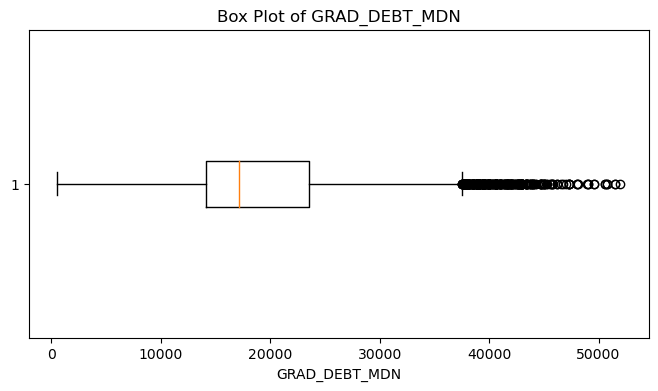

In [45]:
# Let's look at the distribution:
plt.figure(figsize=(8, 4))
column_to_plot = 'GRAD_DEBT_MDN'

# Convert the column to numeric, coercing errors to NaN
institutional_df1[column_to_plot] = pd.to_numeric(institutional_df1[column_to_plot], errors='coerce')

plt.boxplot(institutional_df1['GRAD_DEBT_MDN'].dropna(), vert=False)  # Drop NaN values before plotting
plt.title(f'Box Plot of {column_to_plot}')
plt.xlabel(column_to_plot)
plt.show()

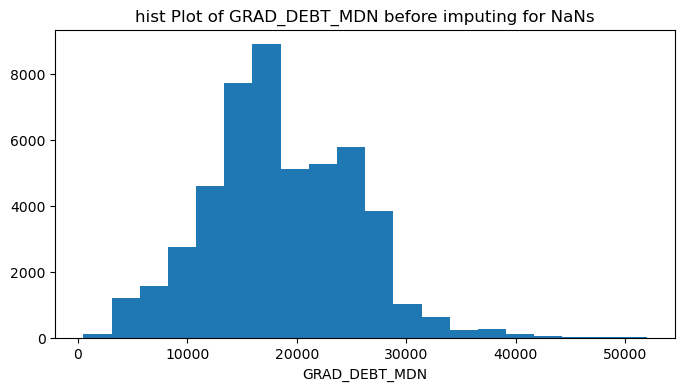

In [46]:
# Let's look at the distribution:
plt.figure(figsize=(8, 4))
column_to_plot = 'GRAD_DEBT_MDN'

plt.hist(institutional_df1['GRAD_DEBT_MDN'].dropna(), bins=20)  # Drop NaN values before plotting
plt.title(f'hist Plot of {column_to_plot} before imputing for NaNs')
plt.xlabel(column_to_plot)
plt.show()

Now let's impute the mean to the NaNs.

In [47]:
# setup the imputation
new_target=imputer.fit_transform(institutional_df1[['GRAD_DEBT_MDN']])

In [48]:
# Execute the imputation in the dataframe.
institutional_df1['GRAD_DEBT_MDN']=pd.Series(new_target.reshape(-1,),index=institutional_df1.index)

In [49]:
# Sanity check to confirm changes in column:
institutional_df1['GRAD_DEBT_MDN'].isna().sum()

0

There are no NaNs left in the `GRAD_DEBT_MDN` column and the column type is now float.

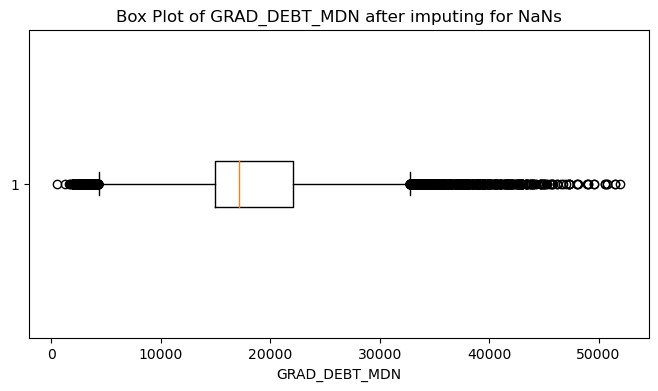

In [50]:
# Let's look at the distribution:
plt.figure(figsize=(8, 4))
column_to_plot = 'GRAD_DEBT_MDN'

plt.boxplot(institutional_df1['GRAD_DEBT_MDN'],vert=False)  
plt.title(f'Box Plot of {column_to_plot} after imputing for NaNs')
plt.xlabel(column_to_plot)
plt.show()

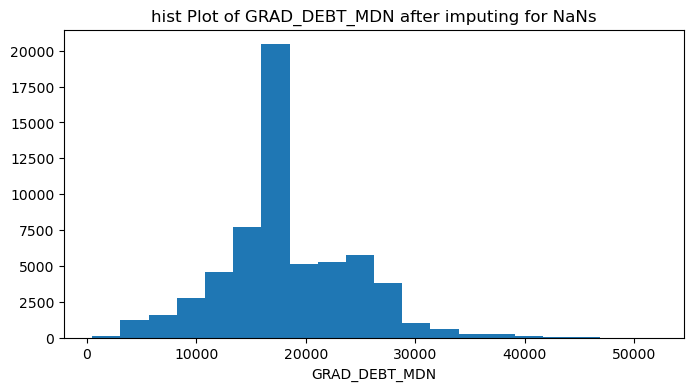

In [51]:
# Let's look at the distribution:
plt.figure(figsize=(8, 4))
column_to_plot = 'GRAD_DEBT_MDN'

plt.hist(institutional_df1['GRAD_DEBT_MDN'],bins=20)  
plt.title(f'hist Plot of {column_to_plot} after imputing for NaNs')
plt.xlabel(column_to_plot)
plt.show()

In [52]:
institutional_df=institutional_df1.copy()

**Observations:**
- Before imputing the NaNs the distribution was distributed between 0 and approx. 38,000 USD. 
- With the median at 18,000 USD. The distribution is right-skewed with outliers at with debt greater then 38K USD. 
- From the box plot, after imputing to the NaNs, the distribution narrows, with lower debt values also being considered outliers now. From the changes in the histogram, the mean column is significantly larger then the original distribution.
- The distribution after imputing was checked using both mean and median, the resulting distributions were very similar. A mean strategy is being considered for now because it considers outliers; this decision can be revisited later.

[Back to the top](#taboc)

**Other columns to impute**:

We can use the same approach here as the `GRAD_DEBT_MDN` column.

In [53]:
#This inludes the following columns:
columns_tofill=['PELL_DEBT_MDN','COUNT_WNE_P10','COUNT_NWNE_P10','NPT4_PUB','NPT4_PRIV','NPT4_PROG','PCTPELL','PCTFLOAN','UGDS','UG','ADM_RATE',
                'SAT_AVG','ACTCMMID','ACTENMID','ACTMTMID','ACTWRMID']

In [54]:
institutional_df[columns_tofill].sample(10)

,PELL_DEBT_MDN,COUNT_WNE_P10,COUNT_NWNE_P10,NPT4_PUB,NPT4_PRIV,NPT4_PROG,PCTPELL,PCTFLOAN,UGDS,UG,ADM_RATE,SAT_AVG,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID
48445,10266,NaN,NaN,NaN,27195.0,NaN,0.6248,0.6181,1382.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27381,21227,NaN,NaN,18914.0,NaN,NaN,0.3651,0.6266,497.0,NaN,0.8387,1095.0,28.0,26.0,25.0,NaN
20884,13544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1053.0,NaN,0.5424,1050.0,NaN,NaN,NaN,NaN
54858,13750,1445,77,NaN,NaN,NaN,NaN,NaN,5376.0,NaN,0.3699,1316.0,29.0,NaN,NaN,NaN
55289,10500,2511,164,NaN,NaN,NaN,NaN,NaN,9353.0,NaN,0.9414,1050.0,23.0,22.0,23.0,NaN
47687,5292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2721.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52866,19309,156,PrivacySuppressed,NaN,22508.0,NaN,0.1724,0.7448,408.0,NaN,0.5714,NaN,NaN,NaN,NaN,NaN
53035,20250,1375,124,NaN,22812.0,NaN,0.2276,0.3034,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15609,19500,488,36,NaN,20779.0,NaN,0.2676,0.7476,1749.0,NaN,0.5433,1031.0,21.0,19.0,20.0,NaN


In [55]:
# Let's get a NaN and 'PrivacySuppressed'count for each of the columns:
nan_counts = []
privacy_suppressed_counts = []

for column in columns_tofill:
    nan_count = institutional_df[column].isna().sum()
    privacy_suppressed_count = (institutional_df[column] == 'PrivacySuppressed').sum()
    
    nan_counts.append(nan_count)
    privacy_suppressed_counts.append(privacy_suppressed_count)
    
# Create a new DataFrame with the counts
counts_df = pd.DataFrame({
    'Column': columns_tofill,
    'NaN_Count': nan_counts,
    'PrivacySuppressed_Count': privacy_suppressed_counts})

In [56]:
institutional_df.shape

(60839, 125)

In [57]:
counts_df.columns

Index(['Column', 'NaN_Count', 'PrivacySuppressed_Count'], dtype='object')

In [58]:
num_rows=institutional_df.shape[0]
counts_df['Percentage_Nan']=round(counts_df['NaN_Count']/num_rows*100,2)
counts_df

,Column,NaN_Count,PrivacySuppressed_Count,Percentage_Nan
0,PELL_DEBT_MDN,5104,4452,8.39
1,COUNT_WNE_P10,41692,806,68.53
2,COUNT_NWNE_P10,43799,1112,71.99
3,NPT4_PUB,52264,0,85.91
4,NPT4_PRIV,39556,0,65.02
5,NPT4_PROG,60816,0,99.96
6,PCTPELL,25952,0,42.66
7,PCTFLOAN,28311,0,46.53
8,UGDS,2272,0,3.73
9,UG,58739,0,96.55


Some of these columns have very significant amounts of information missing to be of any use. This includes:
- ACTWRMID, Midpoint of the ACT writing score. 
- NPT4_PROG, Average net price for the largest program at the institution for program-year institutions.
- UG, enrollment of all undergraduate students. (UGDS seems to be a much better representation of num. of undergraduate students).

These columns can be dropped. Some of the remaining columns also have very high NaNs however they are being kept so that in the next iteration when the data can be imputed with more granularity these columns are not lost. One method would be to create a create running averages over the years for the universities and estimating the missing values based on that. Reliable External data sources can also be used to impute data when more time is available when this is revisited.

In [59]:
institutional_df.drop(columns=['ACTWRMID','NPT4_PROG','UG'], inplace=True)
institutional_df.shape

(60839, 122)

In [60]:
#update columns_tofill list:

columns_tofill=['PELL_DEBT_MDN','COUNT_WNE_P10','COUNT_NWNE_P10','NPT4_PUB','NPT4_PRIV','PCTPELL','PCTFLOAN','UGDS','ADM_RATE',
                'SAT_AVG','ACTCMMID','ACTENMID','ACTMTMID']

In [61]:
institutional_df1=institutional_df.copy()

In [62]:
counts_df['PrivacySuppressed_Count'].sum()

6370

In [63]:
# Change all the 'PrivacySuppressed' to NaNs.
for columns in columns_tofill:  
    institutional_df1[columns] = np.where(institutional_df1[columns] == 'PrivacySuppressed',
                                               np.nan, institutional_df1[columns])
    # change the column type to 'float':
    institutional_df1[columns].astype(np.float64)

In [64]:
institutional_df1[columns_tofill].isna().sum().sum()

416222

Let's have a look a the distributions before removing the NaN's for reference:

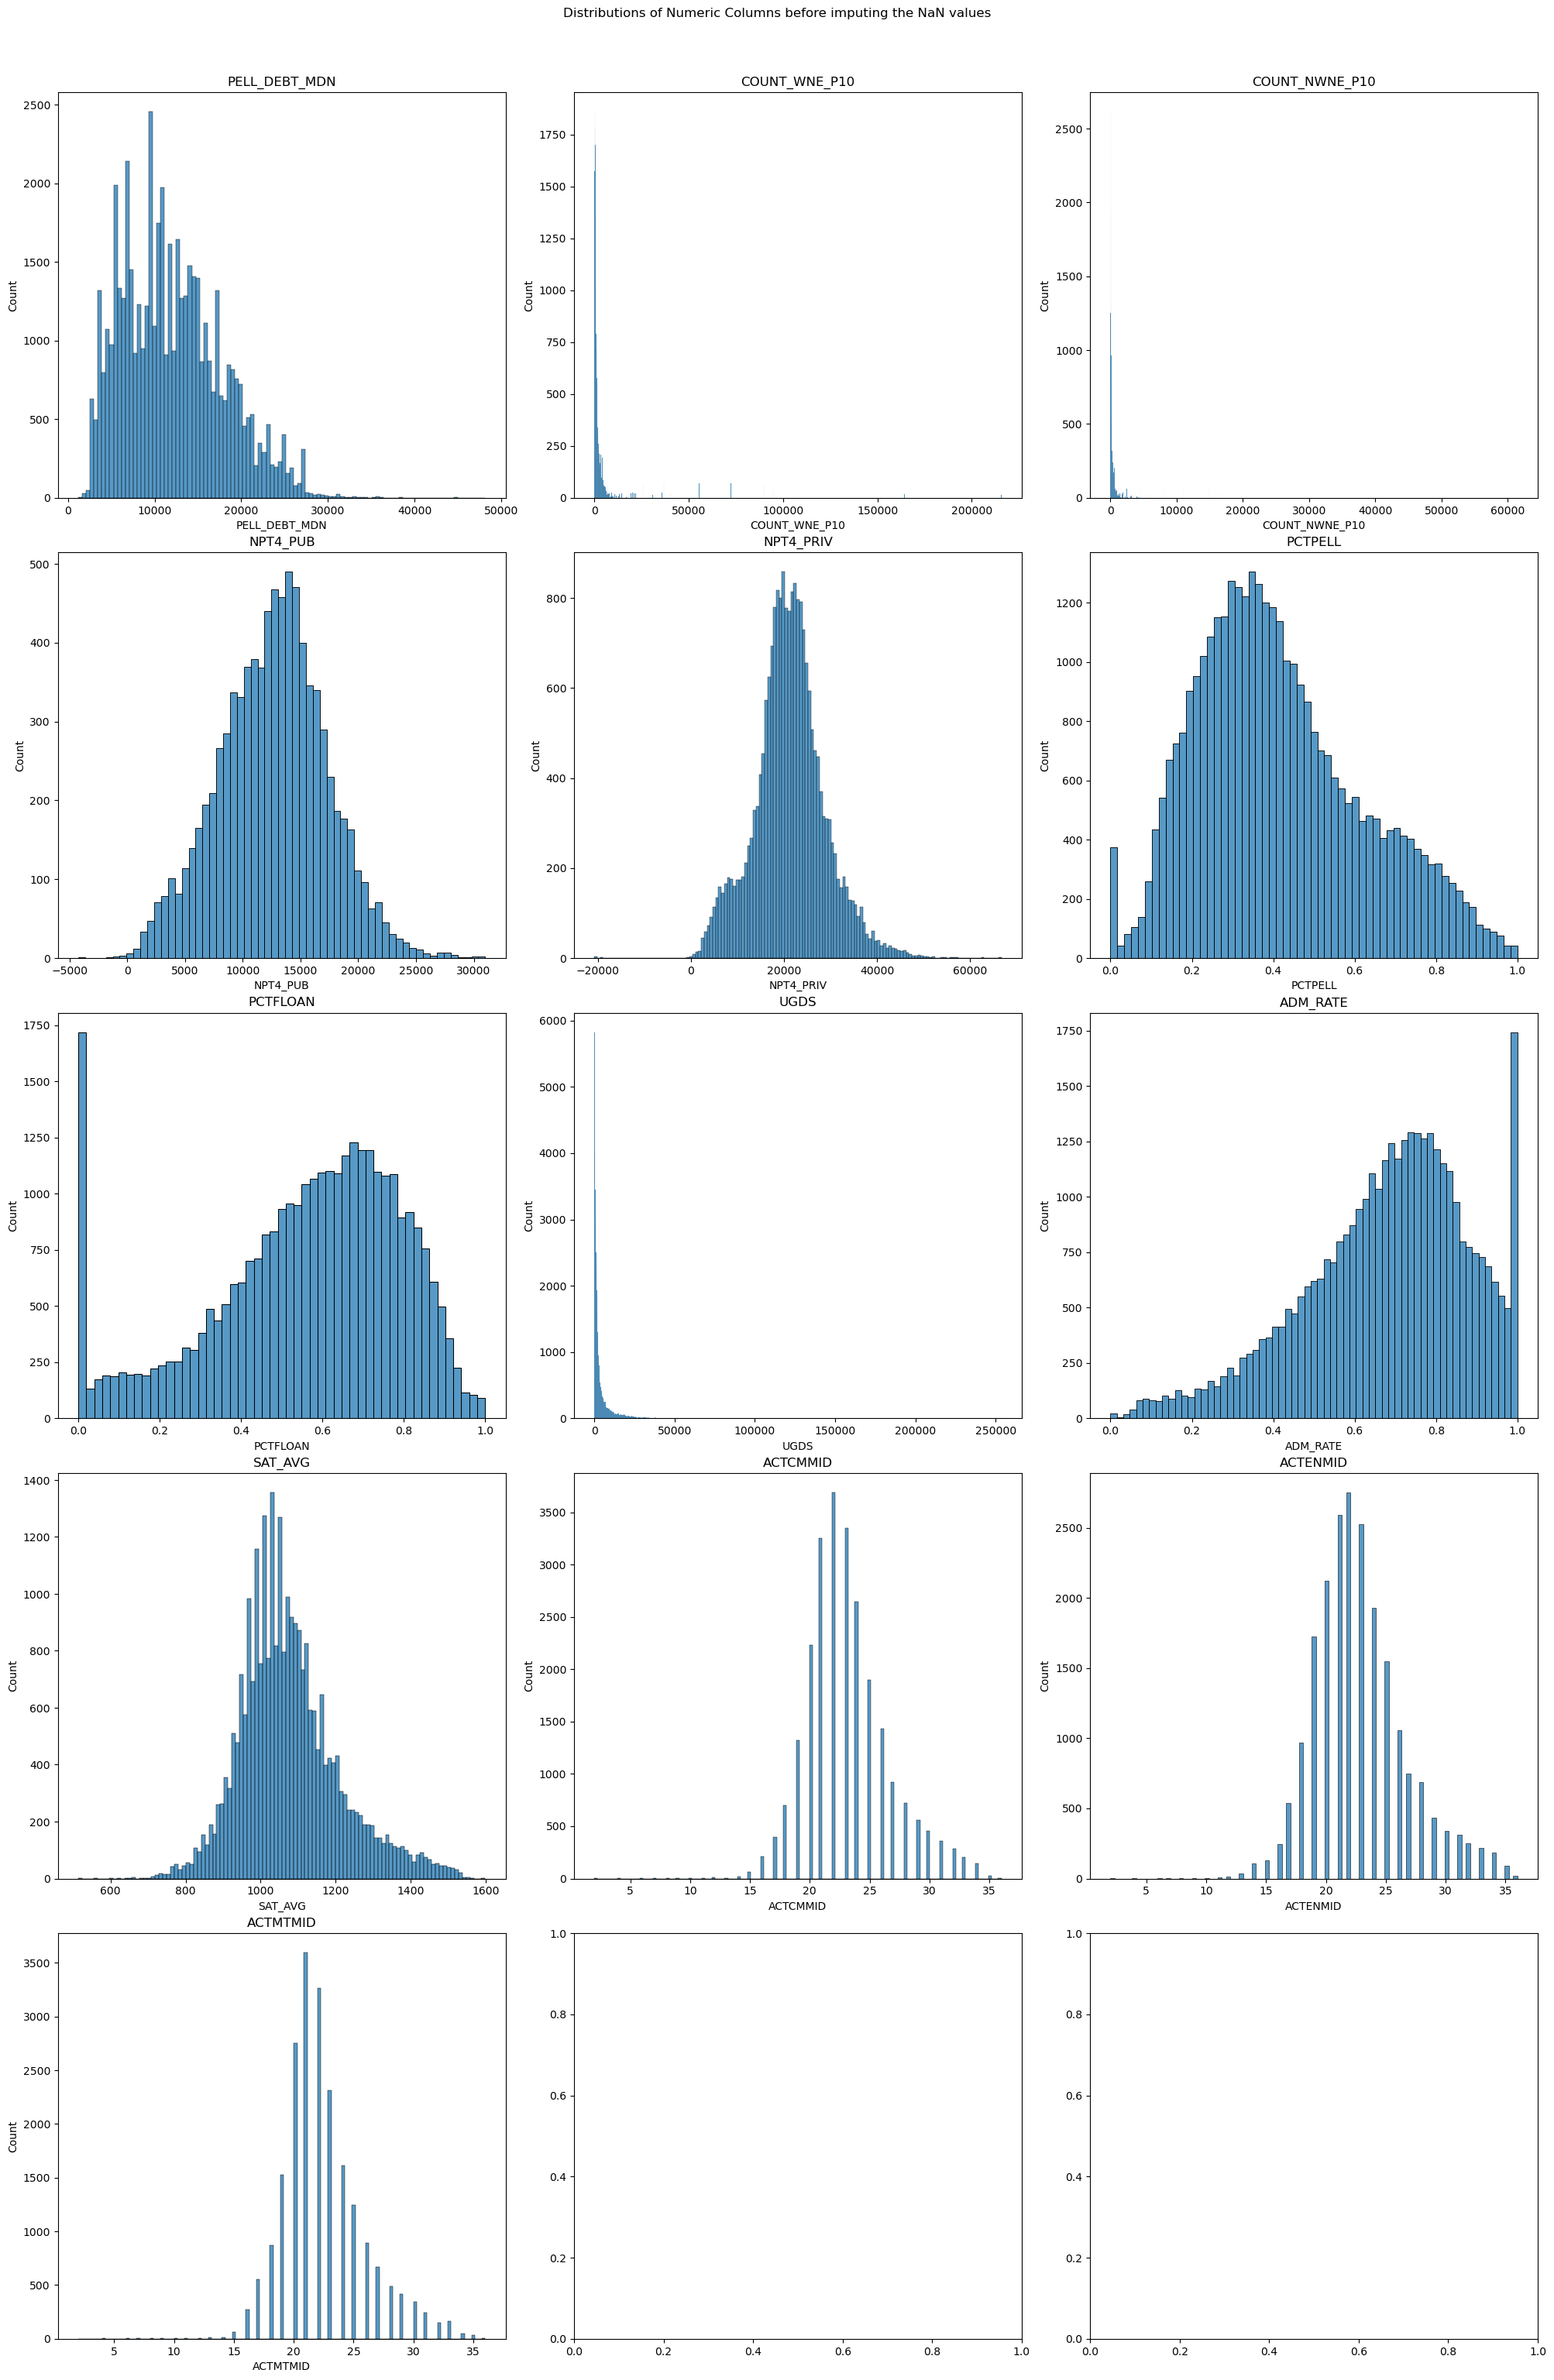

In [65]:
# Create a dataframe of only the numeric columns:
review_plot_df = institutional_df1[columns_tofill]

# Check the distributions of the numeric columns
plt.subplots(5,3, figsize=(20,30))

for i, column in enumerate(review_plot_df.columns):
    plt.subplot(5, 3, i + 1)
    # Convert the column to numeric (ignoring errors for non-numeric values)
    numeric_data = pd.to_numeric(review_plot_df[column], errors='coerce')
    sns.histplot(x=numeric_data)  # Use x parameter to specify numeric data
    plt.title(column)
    plt.suptitle("Distributions of Numeric Columns before imputing the NaN values", y=1.02, fontsize=12)
    plt.tight_layout(pad=0.5)

Now we can use the same method as earlier using the SimpleImputer to loop through the columns and assign values to the NaNs.

In [66]:
# Change all the 'PrivacySuppressed' to NaNs.
for columns in columns_tofill:  
    # setup the imputation
    new_target=imputer.fit_transform(institutional_df1[[columns]])
    # Execute the imputation in the dataframe.
    institutional_df1[columns]=pd.Series(new_target.reshape(-1,),index=institutional_df1.index)

Let's check the NaN values:

In [67]:
#Sanity check:
institutional_df1[columns_tofill].isna().sum().sum()

0

All the NaNs in the 'columns_tofill' have been imputed.
Let's have look at how the distributions have changed now.

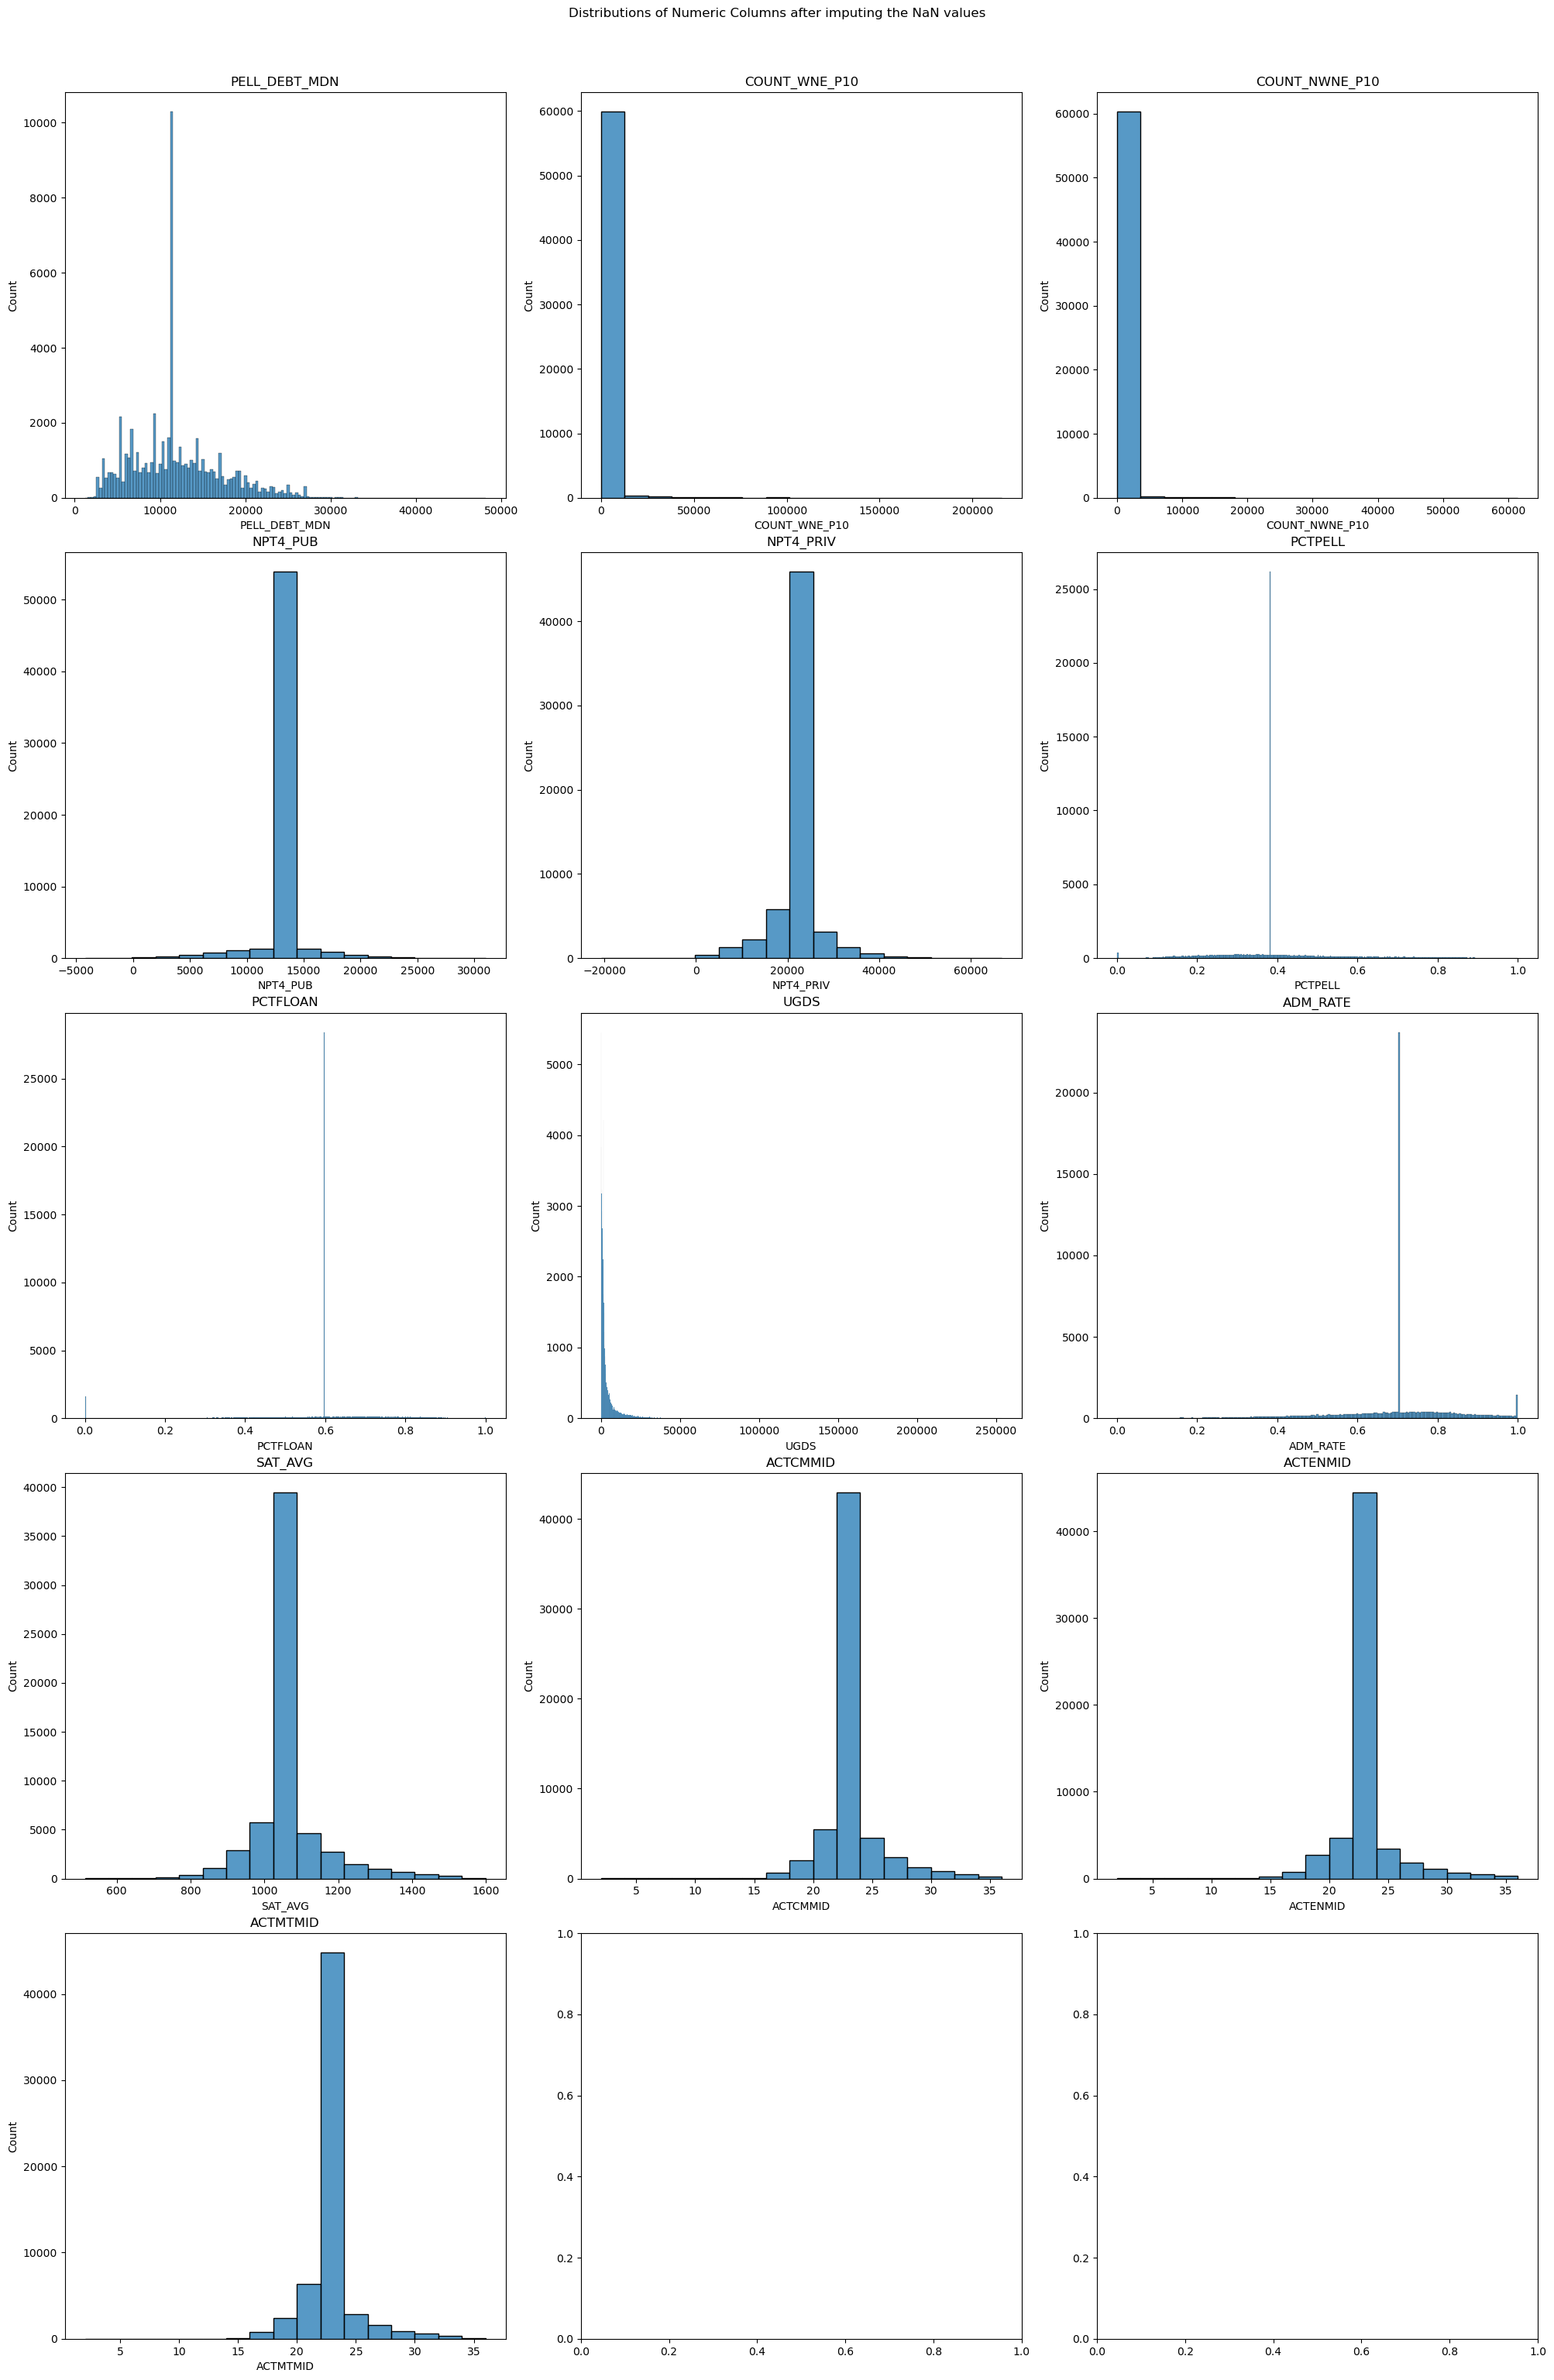

In [68]:
# Create a dataframe of only the numeric columns:
review_plot_df = institutional_df1[columns_tofill]

# Check the distributions of the numeric columns
plt.subplots(5,3, figsize=(20,30))

for i, column in enumerate(review_plot_df.columns):
    plt.subplot(5, 3, i + 1)
    # Convert the column to numeric (ignoring errors for non-numeric values)
    numeric_data = pd.to_numeric(review_plot_df[column], errors='coerce')
    sns.histplot(x=numeric_data)  # Use x parameter to specify numeric data
    plt.title(column)
    plt.suptitle("Distributions of Numeric Columns after imputing the NaN values", y=1.02, fontsize=12)
    plt.tight_layout(pad=0.5)

**Observations**:
- The imputed NaNs have an outsized influence on the distributions. When comparing the strategies, both mean and median were assessed - Median results were less drastic then the mean and therefore selected for this first pass. Once better data can be obtained, these values need to adjusted to return a closer distribution to the one in the data.

In [69]:
for column, dtype in institutional_df.dtypes.items():
    print(f"{column}: {dtype}")

UNITID: int64
INSTNM: object
Year: int64
LONGITUDE: float64
LATITUDE: float64
REGION: int64
CONTROL: int64
HIGHDEG: int64
NUM4_PUB: int64
NUM4_PRIV: int64
UGDS: float64
ADM_RATE: float64
SAT_AVG: float64
SATVR25: float64
SATMT25: float64
SATWR25: float64
SATVR75: float64
SATMT75: float64
SATWR75: float64
SATVRMID: float64
SATMTMID: float64
SATWRMID: float64
ACTCM25: float64
ACTEN25: float64
ACTMT25: float64
ACTWR25: float64
ACTCM75: float64
ACTEN75: float64
ACTMT75: float64
ACTWR75: float64
ACTCMMID: float64
ACTENMID: float64
ACTMTMID: float64
PCIP01: float64
PCIP03: float64
PCIP04: float64
PCIP05: float64
PCIP09: float64
PCIP10: float64
PCIP11: float64
PCIP12: float64
PCIP13: float64
PCIP14: float64
PCIP15: float64
PCIP16: float64
PCIP19: float64
PCIP22: float64
PCIP23: float64
PCIP24: float64
PCIP25: float64
PCIP26: float64
PCIP27: float64
PCIP29: float64
PCIP30: float64
PCIP31: float64
PCIP38: float64
PCIP39: float64
PCIP40: float64
PCIP41: float64
PCIP42: float64
PCIP43: float64
PC

In [70]:
for column, nan_count in institutional_df.isna().sum().items():
    print(f"{column}: {nan_count}")

UNITID: 0
INSTNM: 0
Year: 0
LONGITUDE: 58467
LATITUDE: 58467
REGION: 0
CONTROL: 0
HIGHDEG: 0
NUM4_PUB: 0
NUM4_PRIV: 0
UGDS: 2272
ADM_RATE: 23367
SAT_AVG: 33128
SATVR25: 35964
SATMT25: 35834
SATWR25: 53961
SATVR75: 35963
SATMT75: 35836
SATWR75: 53961
SATVRMID: 35968
SATMTMID: 35838
SATWRMID: 53961
ACTCM25: 35909
ACTEN25: 39235
ACTMT25: 39244
ACTWR25: 58803
ACTCM75: 35913
ACTEN75: 39236
ACTMT75: 39245
ACTWR75: 58804
ACTCMMID: 35918
ACTENMID: 39240
ACTMTMID: 39249
PCIP01: 0
PCIP03: 0
PCIP04: 0
PCIP05: 0
PCIP09: 0
PCIP10: 0
PCIP11: 0
PCIP12: 0
PCIP13: 0
PCIP14: 0
PCIP15: 0
PCIP16: 0
PCIP19: 0
PCIP22: 0
PCIP23: 0
PCIP24: 0
PCIP25: 0
PCIP26: 0
PCIP27: 0
PCIP29: 0
PCIP30: 0
PCIP31: 0
PCIP38: 0
PCIP39: 0
PCIP40: 0
PCIP41: 0
PCIP42: 0
PCIP43: 0
PCIP44: 0
PCIP45: 0
PCIP46: 0
PCIP47: 0
PCIP48: 0
PCIP49: 0
PCIP50: 0
PCIP51: 0
PCIP52: 0
PCIP54: 0
CIP01BACHL: 0
CIP03BACHL: 0
CIP04BACHL: 0
CIP05BACHL: 0
CIP09BACHL: 0
CIP10BACHL: 0
CIP11BACHL: 0
CIP12BACHL: 0
CIP13BACHL: 0
CIP14BACHL: 0
CIP15BACHL: 0


In [71]:
columns_toremove=['SATVR25','SATMT25','SATWR25','SATVR75','SATMT75','SATWR75','SATVRMID','SATMTMID','SATWRMID','ACTCM25','ACTEN25','ACTMT25',
 'ACTWR25','ACTCM75','ACTEN75','ACTMT75','ACTWR75']
# Drop the specified columns
institutional_df.drop(columns=columns_toremove, inplace=True)

In [72]:
for column, nan_count in institutional_df.isna().sum().items():
    print(f"{column}: {nan_count}")

UNITID: 0
INSTNM: 0
Year: 0
LONGITUDE: 58467
LATITUDE: 58467
REGION: 0
CONTROL: 0
HIGHDEG: 0
NUM4_PUB: 0
NUM4_PRIV: 0
UGDS: 2272
ADM_RATE: 23367
SAT_AVG: 33128
ACTCMMID: 35918
ACTENMID: 39240
ACTMTMID: 39249
PCIP01: 0
PCIP03: 0
PCIP04: 0
PCIP05: 0
PCIP09: 0
PCIP10: 0
PCIP11: 0
PCIP12: 0
PCIP13: 0
PCIP14: 0
PCIP15: 0
PCIP16: 0
PCIP19: 0
PCIP22: 0
PCIP23: 0
PCIP24: 0
PCIP25: 0
PCIP26: 0
PCIP27: 0
PCIP29: 0
PCIP30: 0
PCIP31: 0
PCIP38: 0
PCIP39: 0
PCIP40: 0
PCIP41: 0
PCIP42: 0
PCIP43: 0
PCIP44: 0
PCIP45: 0
PCIP46: 0
PCIP47: 0
PCIP48: 0
PCIP49: 0
PCIP50: 0
PCIP51: 0
PCIP52: 0
PCIP54: 0
CIP01BACHL: 0
CIP03BACHL: 0
CIP04BACHL: 0
CIP05BACHL: 0
CIP09BACHL: 0
CIP10BACHL: 0
CIP11BACHL: 0
CIP12BACHL: 0
CIP13BACHL: 0
CIP14BACHL: 0
CIP15BACHL: 0
CIP16BACHL: 0
CIP19BACHL: 0
CIP22BACHL: 0
CIP23BACHL: 0
CIP24BACHL: 0
CIP25BACHL: 0
CIP26BACHL: 0
CIP27BACHL: 0
CIP29BACHL: 0
CIP30BACHL: 0
CIP31BACHL: 0
CIP38BACHL: 0
CIP39BACHL: 0
CIP40BACHL: 0
CIP41BACHL: 0
CIP42BACHL: 0
CIP43BACHL: 0
CIP44BACHL: 0
CIP45B

In [73]:
institutional_df.shape

(60839, 105)

In [74]:
institutional_df=institutional_df1.copy()

[Back to the top](#taboc)

<a id = "latlon"></a>
**E.6. Latitude and Longitude**: 

(`LATITUDE`,`LONGITUDE`)

In [75]:
print(f' The datatype for column `LATITUDE` is: {institutional_df["LATITUDE"].dtype}.')
print(f' The datatype for column `LONGITUDE` is: {institutional_df["LONGITUDE"].dtype}.')

 The datatype for column `LATITUDE` is: float64.
 The datatype for column `LONGITUDE` is: float64.


The columns are the correct data type. We now need to check for missing data, i.e. NaN's 

In [76]:
institutional_df["LATITUDE"].isna().sum()

58467

In [78]:
lat_lon_df = institutional_df.loc[
    (institutional_df['LATITUDE'].notna()) & (institutional_df['LONGITUDE'].notna())
][['INSTNM','LATITUDE','LONGITUDE']].drop_duplicates(subset=['INSTNM'])
lat_lon_df 

,INSTNM,LATITUDE,LONGITUDE
43756,Alabama A & M University,34.783368,-86.568502
43757,University of Alabama at Birmingham,33.505697,-86.799345
43758,Amridge University,32.362609,-86.174010
43759,University of Alabama in Huntsville,34.724557,-86.640449
43760,Alabama State University,32.364317,-86.295677
...,...,...,...
46123,California Northstate University,38.405942,-121.481542
46124,Antigua College International,25.904817,-80.327618
46125,Florida Academy of Nursing,25.978064,-80.306128
46126,Remington College-Knoxville,36.087082,-83.925557


In [79]:
no_of_institutions=institutional_df['INSTNM'].nunique()
no_of_institutions

3375

It can be concluded that the Latitudes and Longitudes for all rows can be imputed for each institutute record from within the dataframe. There is atleast one row for each instititute (`INSTNM`) with Latitude and Longitude values.

In [80]:
nan_mask = institutional_df[['LATITUDE', 'LONGITUDE']].isna()
institutional_df.update(lat_lon_df.set_index('INSTNM').loc[:, ['LATITUDE', 'LONGITUDE']])

In [81]:
institutional_df["LATITUDE"].isna().sum()

58467

In [82]:
len(set(institutional_df['INSTNM'].loc[institutional_df["LATITUDE"].isna()]))

3332

In [83]:
# Stored dataframe so it can be used in other notebooks.
%store -r lat_reference_df
lat_reference_df

,LONGITUDE,LATITUDE,INSTNM,UNITID
0,-86.568502,34.783368,Alabama A & M University,100654
1,-86.799345,33.505697,University of Alabama at Birmingham,100663
2,-86.174010,32.362609,Amridge University,100690
3,-86.640449,34.724557,University of Alabama in Huntsville,100706
4,-86.295677,32.364317,Alabama State University,100724
...,...,...,...,...
6041,-97.660482,30.415828,Universal Technical Institute-West Texas,497286
6042,-115.206409,36.142355,Avalon Institute-Las Vegas,497301
6043,-115.158173,36.117236,Medspa Academies-National Institute of Modern ...,497310
6044,-75.015417,39.939428,American Institute-Cherry Hill,497329


In [90]:
institutional_df.update(lat_reference_df.set_index('UNITID').loc[:, ['LATITUDE', 'LONGITUDE']])

In [93]:
# Assuming 'INSTNM' is the common column in both dataframes
merged_df = institutional_df.merge(lat_reference_df[['UNITID', 'LATITUDE', 'LONGITUDE']], on='UNITID', how='left')

# Update 'LATITUDE' and 'LONGITUDE' columns in institutional_df with values from merged_df
institutional_df['LATITUDE'] = merged_df['LATITUDE_y'].combine_first(institutional_df['LATITUDE'])
institutional_df['LONGITUDE'] = merged_df['LONGITUDE_y'].combine_first(institutional_df['LONGITUDE'])


In [94]:
institutional_df["LATITUDE"].isna().sum()

1734

In [95]:
len(set(institutional_df['INSTNM'].loc[institutional_df["LATITUDE"].isna()]))

757

In [96]:
institutional_df.head()

,UNITID,INSTNM,Year,LONGITUDE,LATITUDE,REGION,CONTROL,HIGHDEG,NUM4_PUB,NUM4_PRIV,UGDS,ADM_RATE,SAT_AVG,SATVR25,SATMT25,SATWR25,SATVR75,SATMT75,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTEN25,ACTMT25,ACTWR25,ACTCM75,ACTEN75,ACTMT75,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,CIP01BACHL,CIP03BACHL,CIP04BACHL,CIP05BACHL,CIP09BACHL,CIP10BACHL,CIP11BACHL,CIP12BACHL,CIP13BACHL,CIP14BACHL,CIP15BACHL,CIP16BACHL,CIP19BACHL,CIP22BACHL,CIP23BACHL,CIP24BACHL,CIP25BACHL,CIP26BACHL,CIP27BACHL,CIP29BACHL,CIP30BACHL,CIP31BACHL,CIP38BACHL,CIP39BACHL,CIP40BACHL,CIP41BACHL,CIP42BACHL,CIP43BACHL,CIP44BACHL,CIP45BACHL,CIP46BACHL,CIP47BACHL,CIP48BACHL,CIP49BACHL,CIP50BACHL,CIP51BACHL,CIP52BACHL,CIP54BACHL,NPT4_PUB,NPT4_PRIV,PCTPELL,PCTFLOAN,GRAD_DEBT_MDN,PELL_DEBT_MDN,COUNT_NWNE_P10,COUNT_WNE_P10,MN_EARN_WNE_P10,MD_EARN_WNE_P10,PCT25_EARN_WNE_P10,PCT75_EARN_WNE_P10,SD_EARN_WNE_P10
0,100654,Alabama A & M University,2011,-86.568502,34.783368,5,1,4,644,-9999,4112.0,0.5010,846.0,370.0,360.0,370.0,450.0,450.0,440.0,410.0,405.0,405.0,16.0,14.0,15.0,NaN,19.0,19.0,18.0,NaN,18.0,17.0,17.0,0.0388,0.0145,0.0129,0.000,0.0000,0.0517,0.0258,0.0,0.1438,0.0856,0.0404,0.0000,0.0291,0.0,0.0162,0.0210,0.0,0.0985,0.0162,0.0,0.0,0.0000,0.0000,0.0000,0.0226,0.0,0.0630,0.0000,0.0646,0.0485,0.0,0.0,0.0,0.0,0.0162,0.0000,0.1906,0.0000,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,8734.0,21148.0,0.6933,0.7903,26499.0,12092.0,214.0,1532.0,35300,31400,16800,47000,27800
1,100663,University of Alabama at Birmingham,2011,-86.799345,33.505697,5,1,4,907,-9999,10854.0,0.7223,1107.0,500.0,500.0,NaN,630.0,640.0,NaN,565.0,570.0,NaN,21.0,21.0,20.0,NaN,27.0,28.0,26.0,NaN,24.0,25.0,23.0,0.0000,0.0000,0.0000,0.002,0.0427,0.0000,0.0139,0.0,0.0780,0.0551,0.0000,0.0124,0.0000,0.0,0.0223,0.0060,0.0,0.0819,0.0094,0.0,0.0,0.0000,0.0154,0.0000,0.0184,0.0,0.0641,0.0323,0.0149,0.0447,0.0,0.0,0.0,0.0,0.0417,0.2334,0.1822,0.0293,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,15013.0,21148.0,0.3381,0.5355,17000.0,11500.0,365.0,2661.0,46300,40300,24900,57900,41900
2,100690,Amridge University,2011,-86.174010,32.362609,5,2,4,-9999,2,360.0,0.7041,1058.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,22.0,22.0,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0198,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.6931,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.2178,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0693,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12827.0,4422.0,0.6506,0.7415,17740.5,6033.0,46.0,170.0,42100,38100,20800,56100,30500
3,100706,University of Alabama in Huntsville,2011,-86.640449,34.724557,5,1,4,303,-9999,5755.0,0.6368,1164.0,500.0,520.0,NaN,630.0,670.0,NaN,565.0,595.0,NaN,22.0,22.0,21.0,NaN,29.0,30.0,28.0,NaN,26.0,26.0,25.0,0.0000,0.0000,0.0000,0.000,0.0224,0.0000,0.0292,0.0,0.0214,0.2471,0.0000,0.0224,0.0000,0.0,0.0204,0.0000,0.0,0.0652,0.0146,0.0,0.0,0.0000,0.0117,0.0000,0.0311,0.0,0.0331,0.0000,0.0000,0.0175,0.0,0.0,0.0,0.0,0.0360,0.1819,0.2325,0.0136,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,9677.0,21148.0,0.3176,0.4779,20000.0,12750.0,178.0,1135.0,52700,46600,29400,71300,35900
4,100724,Alabama State University,2011,-86.295677,32.364317,5,1,4,639,-9999,4719.0,0.5080,783.0,360.0,350.0,NaN,450.0,450.0,NaN,405.0,400.0,NaN,14.0,13.0,14.0,NaN,18.0,18.0,16.0

In [100]:
# Percentage of institutions missing latitude and longitude data:
print(f'{round(757*100/2692,2)}% of the institutions are missing Latitude and Longitude data.')

28.12% of the institutions are missing Latitude and Longitude data.


In [101]:
# delete these institutions:
institutional_df.dropna(subset=['LATITUDE'], inplace=True)

In [102]:
institutional_df["LATITUDE"].isna().sum()

0

In [103]:
institutional_df.head()

,UNITID,INSTNM,Year,LONGITUDE,LATITUDE,REGION,CONTROL,HIGHDEG,NUM4_PUB,NUM4_PRIV,UGDS,ADM_RATE,SAT_AVG,SATVR25,SATMT25,SATWR25,SATVR75,SATMT75,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTEN25,ACTMT25,ACTWR25,ACTCM75,ACTEN75,ACTMT75,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,CIP01BACHL,CIP03BACHL,CIP04BACHL,CIP05BACHL,CIP09BACHL,CIP10BACHL,CIP11BACHL,CIP12BACHL,CIP13BACHL,CIP14BACHL,CIP15BACHL,CIP16BACHL,CIP19BACHL,CIP22BACHL,CIP23BACHL,CIP24BACHL,CIP25BACHL,CIP26BACHL,CIP27BACHL,CIP29BACHL,CIP30BACHL,CIP31BACHL,CIP38BACHL,CIP39BACHL,CIP40BACHL,CIP41BACHL,CIP42BACHL,CIP43BACHL,CIP44BACHL,CIP45BACHL,CIP46BACHL,CIP47BACHL,CIP48BACHL,CIP49BACHL,CIP50BACHL,CIP51BACHL,CIP52BACHL,CIP54BACHL,NPT4_PUB,NPT4_PRIV,PCTPELL,PCTFLOAN,GRAD_DEBT_MDN,PELL_DEBT_MDN,COUNT_NWNE_P10,COUNT_WNE_P10,MN_EARN_WNE_P10,MD_EARN_WNE_P10,PCT25_EARN_WNE_P10,PCT75_EARN_WNE_P10,SD_EARN_WNE_P10
0,100654,Alabama A & M University,2011,-86.568502,34.783368,5,1,4,644,-9999,4112.0,0.5010,846.0,370.0,360.0,370.0,450.0,450.0,440.0,410.0,405.0,405.0,16.0,14.0,15.0,NaN,19.0,19.0,18.0,NaN,18.0,17.0,17.0,0.0388,0.0145,0.0129,0.000,0.0000,0.0517,0.0258,0.0,0.1438,0.0856,0.0404,0.0000,0.0291,0.0,0.0162,0.0210,0.0,0.0985,0.0162,0.0,0.0,0.0000,0.0000,0.0000,0.0226,0.0,0.0630,0.0000,0.0646,0.0485,0.0,0.0,0.0,0.0,0.0162,0.0000,0.1906,0.0000,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,8734.0,21148.0,0.6933,0.7903,26499.0,12092.0,214.0,1532.0,35300,31400,16800,47000,27800
1,100663,University of Alabama at Birmingham,2011,-86.799345,33.505697,5,1,4,907,-9999,10854.0,0.7223,1107.0,500.0,500.0,NaN,630.0,640.0,NaN,565.0,570.0,NaN,21.0,21.0,20.0,NaN,27.0,28.0,26.0,NaN,24.0,25.0,23.0,0.0000,0.0000,0.0000,0.002,0.0427,0.0000,0.0139,0.0,0.0780,0.0551,0.0000,0.0124,0.0000,0.0,0.0223,0.0060,0.0,0.0819,0.0094,0.0,0.0,0.0000,0.0154,0.0000,0.0184,0.0,0.0641,0.0323,0.0149,0.0447,0.0,0.0,0.0,0.0,0.0417,0.2334,0.1822,0.0293,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,15013.0,21148.0,0.3381,0.5355,17000.0,11500.0,365.0,2661.0,46300,40300,24900,57900,41900
2,100690,Amridge University,2011,-86.174010,32.362609,5,2,4,-9999,2,360.0,0.7041,1058.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,22.0,22.0,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0198,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.6931,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.2178,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0693,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12827.0,4422.0,0.6506,0.7415,17740.5,6033.0,46.0,170.0,42100,38100,20800,56100,30500
3,100706,University of Alabama in Huntsville,2011,-86.640449,34.724557,5,1,4,303,-9999,5755.0,0.6368,1164.0,500.0,520.0,NaN,630.0,670.0,NaN,565.0,595.0,NaN,22.0,22.0,21.0,NaN,29.0,30.0,28.0,NaN,26.0,26.0,25.0,0.0000,0.0000,0.0000,0.000,0.0224,0.0000,0.0292,0.0,0.0214,0.2471,0.0000,0.0224,0.0000,0.0,0.0204,0.0000,0.0,0.0652,0.0146,0.0,0.0,0.0000,0.0117,0.0000,0.0311,0.0,0.0331,0.0000,0.0000,0.0175,0.0,0.0,0.0,0.0,0.0360,0.1819,0.2325,0.0136,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,9677.0,21148.0,0.3176,0.4779,20000.0,12750.0,178.0,1135.0,52700,46600,29400,71300,35900
4,100724,Alabama State University,2011,-86.295677,32.364317,5,1,4,639,-9999,4719.0,0.5080,783.0,360.0,350.0,NaN,450.0,450.0,NaN,405.0,400.0,NaN,14.0,13.0,14.0,NaN,18.0,18.0,16.0

In [104]:
institutional_df.shape

(59105, 122)

[Back to the top](#taboc)

**E.7. Target variable: Earnings columns**(`MD_EARN_WNE_P10`,`PCT25_EARN_WNE_P10`,`PCT75_EARN_WNE_P10`):
<a id = "earnings"></a>

In [105]:
inst_df=institutional_df.copy()
inst_df.shape

(59105, 122)

In [106]:
print('MD_EARN_WNE_P10 NaNs:',inst_df['MD_EARN_WNE_P10'].isna().sum())
print('PCT25_EARN_WNE_P10 NaNs:',inst_df['PCT25_EARN_WNE_P10'].isna().sum())
print('PCT75_EARN_WNE_P10 NaNs:',inst_df['PCT75_EARN_WNE_P10'].isna().sum())

MD_EARN_WNE_P10 NaNs: 40721
PCT25_EARN_WNE_P10 NaNs: 40772
PCT75_EARN_WNE_P10 NaNs: 40732


The total number of NaNs in the Median Earning column 'MD_EARN_WNE_P10' us 40721. The other two columns have more NaNs.

In [107]:
# NaN as a percentage of column data:
print(f'{round(inst_df['MD_EARN_WNE_P10'].isna().sum()*100/inst_df.shape[0],2)}')

68.9

The first approach we can explore to impute NaNs is to use the Q25 and Q75 values to impute Q50(median). Let's check if there are columns where we have the quartile information and not the median:

In [111]:
# identify rows that have Q25 and Q75 but no Q50.
impute_q50_fromq25q75=inst_df.loc[
    (inst_df['MD_EARN_WNE_P10'].isna()) &
    (inst_df['PCT25_EARN_WNE_P10'].notna()) &
    (inst_df['PCT75_EARN_WNE_P10'].notna())]
impute_q50_fromq25q75.shape

(0, 122)

We only have the quartile information where the median has also been provided. So the 25the quartile earnings and the 75th quartile earning can't be used to impute the median and can be dropped from the DataFrame.

In [112]:
# delete Q25 and Q75 Earning columns to leave only one target column:
inst_df.drop(['PCT25_EARN_WNE_P10', 'PCT75_EARN_WNE_P10'], axis=1, inplace=True)

In [113]:
inst_df.shape

(59105, 120)

Let's turn all the 'PrivacySuppressed' entires to NaNs and then get the total NaNs again:

In [114]:
# change 'PrivacySuppressed' to NaN:
inst_df['MD_EARN_WNE_P10'] = np.where(inst_df['MD_EARN_WNE_P10'] == 'PrivacySuppressed',
                                               np.nan, inst_df['MD_EARN_WNE_P10'])

In [115]:
# Number of NaNs now:
inst_df['MD_EARN_WNE_P10'].isna().sum()

41534

In [116]:
# NaN as a percentage of column data:
round(inst_df['MD_EARN_WNE_P10'].isna().sum()*100/inst_df.shape[0],2)

70.27

In [117]:
print(f'The number of rows without NaNs in the target column is {inst_df.shape[0]-inst_df["MD_EARN_WNE_P10"].isna().sum()}')

The number of rows without NaNs in the target column is 17571


In [118]:
# change the column type to 'float':
inst_df['MD_EARN_WNE_P10'].astype(np.float64)

0        31400.0
1        40300.0
2        38100.0
3        46600.0
4        27800.0
          ...   
60834        NaN
60835        NaN
60836        NaN
60837        NaN
60838        NaN
Name: MD_EARN_WNE_P10, Length: 59105, dtype: float64

Let's look at the distribution of the target column both as a boxplot and histogram to get a feel for it before any modification / imputation is made.

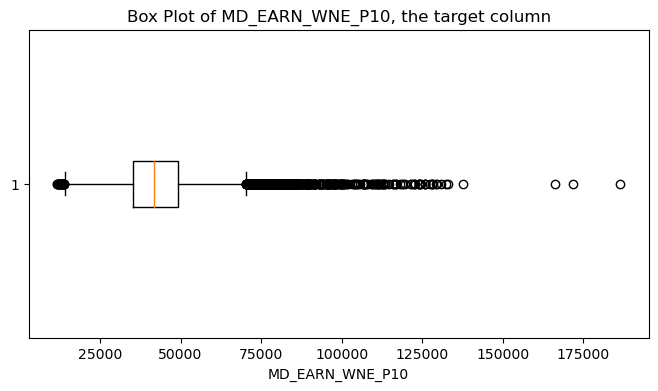

In [119]:
# Let's look at the distribution:
plt.figure(figsize=(8, 4))
column_to_plot = 'MD_EARN_WNE_P10'

# Convert the column to numeric, coercing errors to NaN
inst_df[column_to_plot] = pd.to_numeric(inst_df[column_to_plot], errors='coerce')

# Drop NaN values before plotting
plt.boxplot(inst_df[column_to_plot].dropna(), vert=False)
plt.title(f'Box Plot of {column_to_plot}, the target column')
plt.xlabel(column_to_plot)
plt.show()


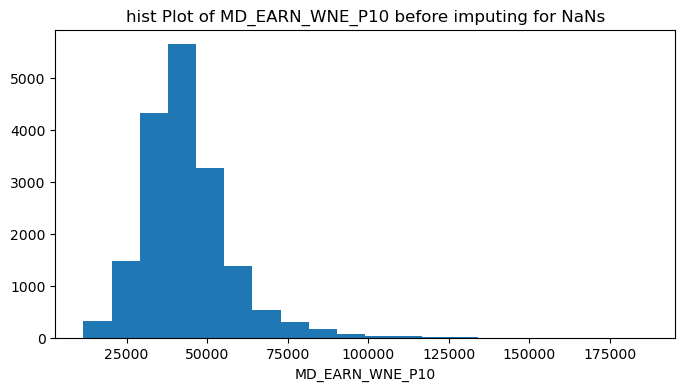

In [120]:
# Let's look at the distribution:
plt.figure(figsize=(8, 4))
column_to_plot = 'MD_EARN_WNE_P10'

plt.hist(inst_df['MD_EARN_WNE_P10'].dropna(), bins=20)  # Drop NaN values before plotting
plt.title(f'hist Plot of {column_to_plot} before imputing for NaNs')
plt.xlabel(column_to_plot)
plt.show()

<a id = "imputemethods"></a>
As per ref.[[4]](#ref4), there are several ways to impute values to the NaNs in the target column. This includes:
1. The **SimpleImputer** from sklearn. This has already been used to impute values in other columns. Use the mean, median, or mode of the target variable to fill in missing values.This is a simple and quick method and works well when the target variable is approximately normally distributed.
2. **Predictive modelling (regression) aka rfimpute:** Train a regression model using other features in your dataset to predict the missing values in the target variable using a random forest regressor.
This approach can capture complex relationships but might be computationally expensive.
3. **KNN Imputer**:It's a more advanced imputation method based on k-nearest neighbors algorithm.It imputes missing values by considering the k-nearest neighbors of each sample with missing values. It uses the values from other features to estimate the missing values, taking into account the similarity between samples.
4. **Time Series Imputation:** because the dataset has time (years) in it, we can use time series methods to impute missing values in the target variable.

As such the main methods considered here are:
- Option-0: Delete NaNs.
- Option-1: SimpleImputer.
- Option-2: RFImpute (regression)
- Option-3: KNN Imputer
- Option-4: Time Series Imputation (Excluded from this phase of the project - not all institutions have sufficient data by year to allow for forward fill method yet. With more data mining / refining, this can be explored in the next stage as an alternative to impute the target variable).

**Note**: with all options 1-4 we are introducing bias into our model by leaking data indirectly into our target column. For the first attempt we will analyse these base case (option-0) and options 1-4. We will pick one option from 1-4 as the way forward. Create a baseline model with both option-0 and the other selected option from options 1-4 and then decide the best way forward.

In [122]:
columns_toremove=['SATVR25','SATMT25','SATWR25','SATVR75','SATMT75','SATWR75','SATVRMID','SATMTMID','SATWRMID','ACTCM25','ACTEN25','ACTMT25',
 'ACTWR25','ACTCM75','ACTEN75','ACTMT75','ACTWR75']
# Drop the specified columns
inst_df.drop(columns=columns_toremove, inplace=True)

In [124]:
# we can also remove 'MN_EARN_WNE_P10' and 'SD_EARN_WNE_P10'
columns_toremove=['MN_EARN_WNE_P10','SD_EARN_WNE_P10']
# Drop the specified columns
inst_df.drop(columns=columns_toremove, inplace=True)

In [125]:
for column, nan_count in inst_df.isna().sum().items():
    print(f"{column}: {nan_count}")

UNITID: 0
INSTNM: 0
Year: 0
LONGITUDE: 0
LATITUDE: 0
REGION: 0
CONTROL: 0
HIGHDEG: 0
NUM4_PUB: 0
NUM4_PRIV: 0
UGDS: 0
ADM_RATE: 0
SAT_AVG: 0
ACTCMMID: 0
ACTENMID: 0
ACTMTMID: 0
PCIP01: 0
PCIP03: 0
PCIP04: 0
PCIP05: 0
PCIP09: 0
PCIP10: 0
PCIP11: 0
PCIP12: 0
PCIP13: 0
PCIP14: 0
PCIP15: 0
PCIP16: 0
PCIP19: 0
PCIP22: 0
PCIP23: 0
PCIP24: 0
PCIP25: 0
PCIP26: 0
PCIP27: 0
PCIP29: 0
PCIP30: 0
PCIP31: 0
PCIP38: 0
PCIP39: 0
PCIP40: 0
PCIP41: 0
PCIP42: 0
PCIP43: 0
PCIP44: 0
PCIP45: 0
PCIP46: 0
PCIP47: 0
PCIP48: 0
PCIP49: 0
PCIP50: 0
PCIP51: 0
PCIP52: 0
PCIP54: 0
CIP01BACHL: 0
CIP03BACHL: 0
CIP04BACHL: 0
CIP05BACHL: 0
CIP09BACHL: 0
CIP10BACHL: 0
CIP11BACHL: 0
CIP12BACHL: 0
CIP13BACHL: 0
CIP14BACHL: 0
CIP15BACHL: 0
CIP16BACHL: 0
CIP19BACHL: 0
CIP22BACHL: 0
CIP23BACHL: 0
CIP24BACHL: 0
CIP25BACHL: 0
CIP26BACHL: 0
CIP27BACHL: 0
CIP29BACHL: 0
CIP30BACHL: 0
CIP31BACHL: 0
CIP38BACHL: 0
CIP39BACHL: 0
CIP40BACHL: 0
CIP41BACHL: 0
CIP42BACHL: 0
CIP43BACHL: 0
CIP44BACHL: 0
CIP45BACHL: 0
CIP46BACHL: 0
CIP47BACH

**OPTION-0:**

In [128]:
# Option-0: Delete NaNs.
option0_df=inst_df.copy()
option0_df.dropna(subset=['MD_EARN_WNE_P10'], inplace=True)
option0_df.shape

(17571, 101)

There are considerably less rows here now but we can keep the original distribution of the data in the target variable for a baseline evaluation for the other imputation methods. We don't need to plot this as the distributions are the same as the figures above.

In [129]:
# change any 'PrivacySuppressed' to NaN.
inst_df['MD_EARN_WNE_P10']=np.where(inst_df['MD_EARN_WNE_P10']=='PrivacySuppressed',np.nan,inst_df['MD_EARN_WNE_P10'])

# change data type to 'float'
inst_df['MD_EARN_WNE_P10'].astype(np.float16)

0        31392.0
1        40288.0
2        38112.0
3        46592.0
4        27808.0
          ...   
60834        NaN
60835        NaN
60836        NaN
60837        NaN
60838        NaN
Name: MD_EARN_WNE_P10, Length: 59105, dtype: float16

**OPTION-1:** SimpleImputer

In [130]:
#Option-1: SimpleImputer.
option1_df=inst_df.copy()

# define the imputer:
imputer=SimpleImputer(strategy='median')

# create instance of imputer
new_target=imputer.fit_transform(option1_df[['MD_EARN_WNE_P10']])

# transform the dataframe:
option1_df['MD_EARN_WNE_P10']=pd.Series(new_target.reshape(-1,),index=institutional_df.index)

# Sanity check for NaNs:
option1_df['MD_EARN_WNE_P10'].isna().sum()

0

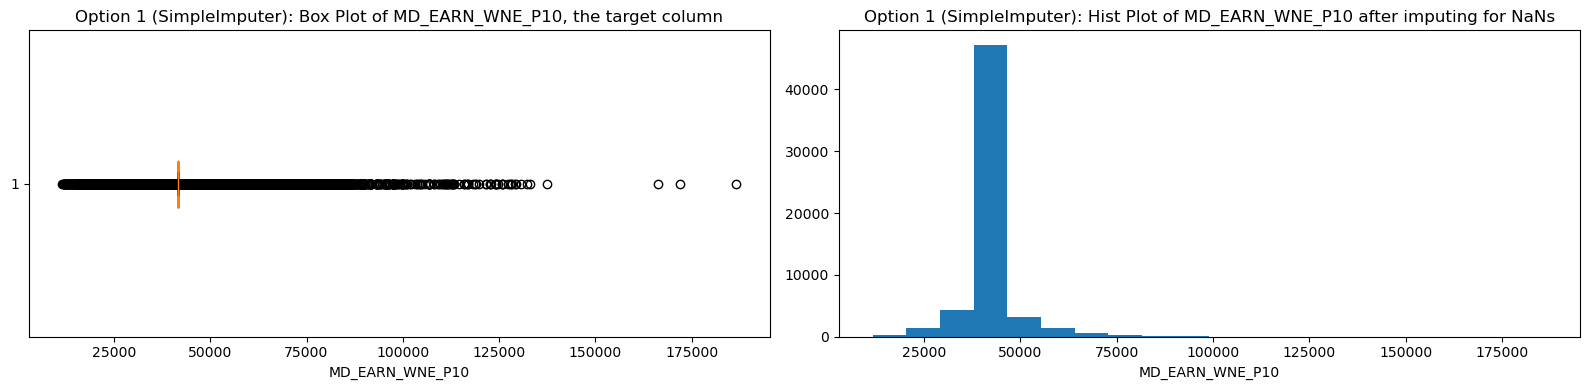

In [142]:
# Let's check the change in distribution:
import matplotlib.pyplot as plt

# Let's look at the distribution using subplots:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Box plot
column_to_plot = 'MD_EARN_WNE_P10'

option1_df[column_to_plot] = pd.to_numeric(option1_df[column_to_plot], errors='coerce')
axes[0].boxplot(option1_df[column_to_plot].dropna(), vert=False)
axes[0].set_title(f'Option 1 (SimpleImputer): Box Plot of {column_to_plot}, the target column')
axes[0].set_xlabel(column_to_plot)

# Histogram
axes[1].hist(option1_df['MD_EARN_WNE_P10'].dropna(), bins=20)
axes[1].set_title(f'Option 1 (SimpleImputer): Hist Plot of {column_to_plot} after imputing for NaNs')
axes[1].set_xlabel(column_to_plot)

# Adjust layout
plt.tight_layout()
plt.show()

In the box plot we can't even see the actual distribution and all the values are outliers.

**OPTION-2:** Linear regression with Random Forest

In [147]:
# Create a new dataframe as a separate reference.
option2_df=inst_df.copy()

for column, dtype in option2_df.dtypes.items():
    print(f"{column}: {dtype}")

UNITID: int64
INSTNM: object
Year: int64
LONGITUDE: float64
LATITUDE: float64
REGION: int64
CONTROL: int64
HIGHDEG: int64
NUM4_PUB: int64
NUM4_PRIV: int64
UGDS: float64
ADM_RATE: float64
SAT_AVG: float64
ACTCMMID: float64
ACTENMID: float64
ACTMTMID: float64
PCIP01: float64
PCIP03: float64
PCIP04: float64
PCIP05: float64
PCIP09: float64
PCIP10: float64
PCIP11: float64
PCIP12: float64
PCIP13: float64
PCIP14: float64
PCIP15: float64
PCIP16: float64
PCIP19: float64
PCIP22: float64
PCIP23: float64
PCIP24: float64
PCIP25: float64
PCIP26: float64
PCIP27: float64
PCIP29: float64
PCIP30: float64
PCIP31: float64
PCIP38: float64
PCIP39: float64
PCIP40: float64
PCIP41: float64
PCIP42: float64
PCIP43: float64
PCIP44: float64
PCIP45: float64
PCIP46: float64
PCIP47: float64
PCIP48: float64
PCIP49: float64
PCIP50: float64
PCIP51: float64
PCIP52: float64
PCIP54: float64
CIP01BACHL: float64
CIP03BACHL: float64
CIP04BACHL: float64
CIP05BACHL: float64
CIP09BACHL: float64
CIP10BACHL: float64
CIP11BACHL: fl

In [148]:
# delete INSTNM and UNITID from option-2 before running the model.
option2_df.drop(['UNITID', 'INSTNM'], axis=1, inplace=True)

In [149]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

column_name = 'MD_EARN_WNE_P10'

# Split the data into train and test sets
train_data = option2_df.dropna(subset=[column_name])
test_data = option2_df[option2_df[column_name].isnull()]

# Define features and target variable
X_train = train_data.drop(column_name, axis=1)
y_train = train_data[column_name]
X_test = test_data.drop(column_name, axis=1)

# Train a model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict missing values
option2_df.loc[option2_df[column_name].isnull(), column_name] = model.predict(X_test)

In [177]:
option2_df = pd.merge(option2_df, inst_df[['INSTNM']], left_index=True, right_index=True, how='left')
option2_df = pd.merge(option2_df, inst_df[['UNITID']], left_index=True, right_index=True, how='left')

option2_df.head()

,Year,LONGITUDE,LATITUDE,REGION,CONTROL,HIGHDEG,NUM4_PUB,NUM4_PRIV,UGDS,ADM_RATE,SAT_AVG,ACTCMMID,ACTENMID,ACTMTMID,PCIP01,PCIP03,PCIP04,PCIP05,PCIP09,PCIP10,PCIP11,PCIP12,PCIP13,PCIP14,PCIP15,PCIP16,PCIP19,PCIP22,PCIP23,PCIP24,PCIP25,PCIP26,PCIP27,PCIP29,PCIP30,PCIP31,PCIP38,PCIP39,PCIP40,PCIP41,PCIP42,PCIP43,PCIP44,PCIP45,PCIP46,PCIP47,PCIP48,PCIP49,PCIP50,PCIP51,PCIP52,PCIP54,CIP01BACHL,CIP03BACHL,CIP04BACHL,CIP05BACHL,CIP09BACHL,CIP10BACHL,CIP11BACHL,CIP12BACHL,CIP13BACHL,CIP14BACHL,CIP15BACHL,CIP16BACHL,CIP19BACHL,CIP22BACHL,CIP23BACHL,CIP24BACHL,CIP25BACHL,CIP26BACHL,CIP27BACHL,CIP29BACHL,CIP30BACHL,CIP31BACHL,CIP38BACHL,CIP39BACHL,CIP40BACHL,CIP41BACHL,CIP42BACHL,CIP43BACHL,CIP44BACHL,CIP45BACHL,CIP46BACHL,CIP47BACHL,CIP48BACHL,CIP49BACHL,CIP50BACHL,CIP51BACHL,CIP52BACHL,CIP54BACHL,NPT4_PUB,NPT4_PRIV,PCTPELL,PCTFLOAN,GRAD_DEBT_MDN,PELL_DEBT_MDN,COUNT_NWNE_P10,COUNT_WNE_P10,MD_EARN_WNE_P10,INSTNM,UNITID
0,2011,-86.568502,34.783368,5,1,4,644,-9999,4112.0,0.5010,846.0,18.0,17.0,17.0,0.0388,0.0145,0.0129,0.000,0.0000,0.0517,0.0258,0.0,0.1438,0.0856,0.0404,0.0000,0.0291,0.0,0.0162,0.0210,0.0,0.0985,0.0162,0.0,0.0,0.0000,0.0000,0.0000,0.0226,0.0,0.0630,0.0000,0.0646,0.0485,0.0,0.0,0.0,0.0,0.0162,0.0000,0.1906,0.0000,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,8734.0,21148.0,0.6933,0.7903,26499.0,12092.0,214.0,1532.0,31400.0,Alabama A & M University,100654
1,2011,-86.799345,33.505697,5,1,4,907,-9999,10854.0,0.7223,1107.0,24.0,25.0,23.0,0.0000,0.0000,0.0000,0.002,0.0427,0.0000,0.0139,0.0,0.0780,0.0551,0.0000,0.0124,0.0000,0.0,0.0223,0.0060,0.0,0.0819,0.0094,0.0,0.0,0.0000,0.0154,0.0000,0.0184,0.0,0.0641,0.0323,0.0149,0.0447,0.0,0.0,0.0,0.0,0.0417,0.2334,0.1822,0.0293,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,15013.0,21148.0,0.3381,0.5355,17000.0,11500.0,365.0,2661.0,40300.0,University of Alabama at Birmingham,100663
2,2011,-86.174010,32.362609,5,2,4,-9999,2,360.0,0.7041,1058.0,23.0,22.0,22.0,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0198,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.6931,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0000,0.2178,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0693,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12827.0,4422.0,0.6506,0.7415,17740.5,6033.0,46.0,170.0,38100.0,Amridge University,100690
3,2011,-86.640449,34.724557,5,1,4,303,-9999,5755.0,0.6368,1164.0,26.0,26.0,25.0,0.0000,0.0000,0.0000,0.000,0.0224,0.0000,0.0292,0.0,0.0214,0.2471,0.0000,0.0224,0.0000,0.0,0.0204,0.0000,0.0,0.0652,0.0146,0.0,0.0,0.0000,0.0117,0.0000,0.0311,0.0,0.0331,0.0000,0.0000,0.0175,0.0,0.0,0.0,0.0,0.0360,0.1819,0.2325,0.0136,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,9677.0,21148.0,0.3176,0.4779,20000.0,12750.0,178.0,1135.0,46600.0,University of Alabama in Huntsville,100706
4,2011,-86.295677,32.364317,5,1,4,639,-9999,4719.0,0.5080,783.0,16.0,16.0,15.0,0.0000,0.0000,0.0000,0.000,0.0704,0.0000,0.0775,0.0,0.1778,0.0000,0.0000,0.0000,0.0000,0.0,0.0088,0.0000,0.0,0.1074,0.0123,0.0,0.0,0.0246,0.0000,0.0000,0.0053,0.0,0.0827,0.1056,0.0827,0.0211,0.0,0.0,0.0,0.0,0.0475,0.0335,0.1408,0.0018,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,5514.0,21148.0,0.7251,0.7694,29002.0,9500.0,309.0,1846.0,27800.0,Alabama State University,100724


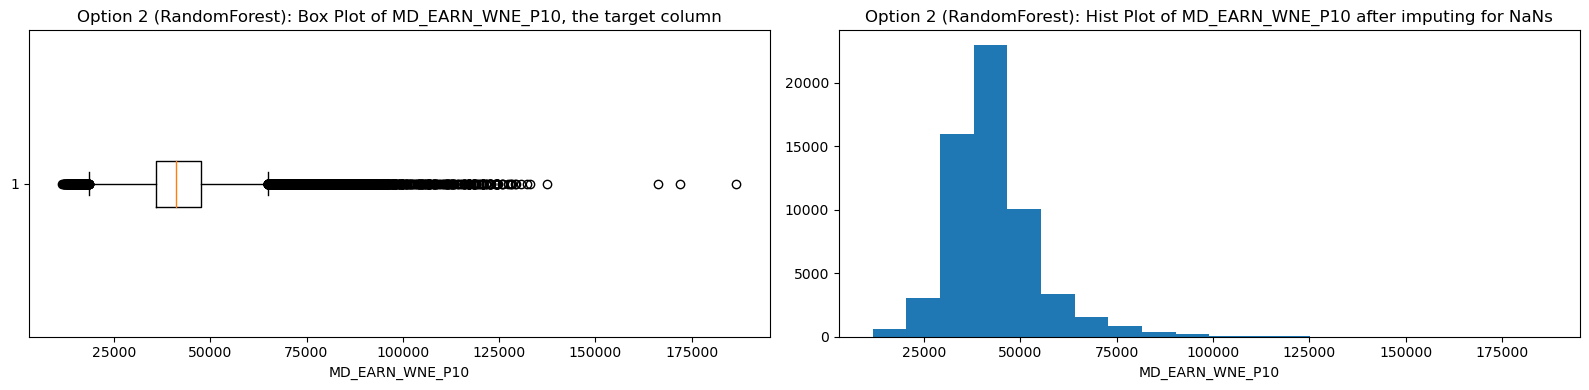

In [150]:
# Let's check the change in distribution:
import matplotlib.pyplot as plt

# Let's look at the distribution using subplots:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Box plot
column_to_plot = 'MD_EARN_WNE_P10'

option2_df[column_to_plot] = pd.to_numeric(option2_df[column_to_plot], errors='coerce')
axes[0].boxplot(option2_df[column_to_plot].dropna(), vert=False)
axes[0].set_title(f'Option 2 (RandomForest): Box Plot of {column_to_plot}, the target column')
axes[0].set_xlabel(column_to_plot)

# Histogram
axes[1].hist(option2_df['MD_EARN_WNE_P10'].dropna(), bins=20)
axes[1].set_title(f'Option 2 (RandomForest): Hist Plot of {column_to_plot} after imputing for NaNs')
axes[1].set_xlabel(column_to_plot)

# Adjust layout
plt.tight_layout()
plt.show()

These values are much more inline with the original distribution of the column compared to the SimpleImputer. The histogram count is much larger because now it considers the 56K plus rows but the distribution shape is the same.

**OPTION-3:** KNN Imputer

In [151]:
# Create a new dataframe as a separate reference.
option3_df=inst_df.copy()

from sklearn.impute import KNNImputer

column_name = 'MD_EARN_WNE_P10'

# Instantiate the imputer
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the data
option3_df[column_name] = imputer.fit_transform(option3_df[[column_name]])

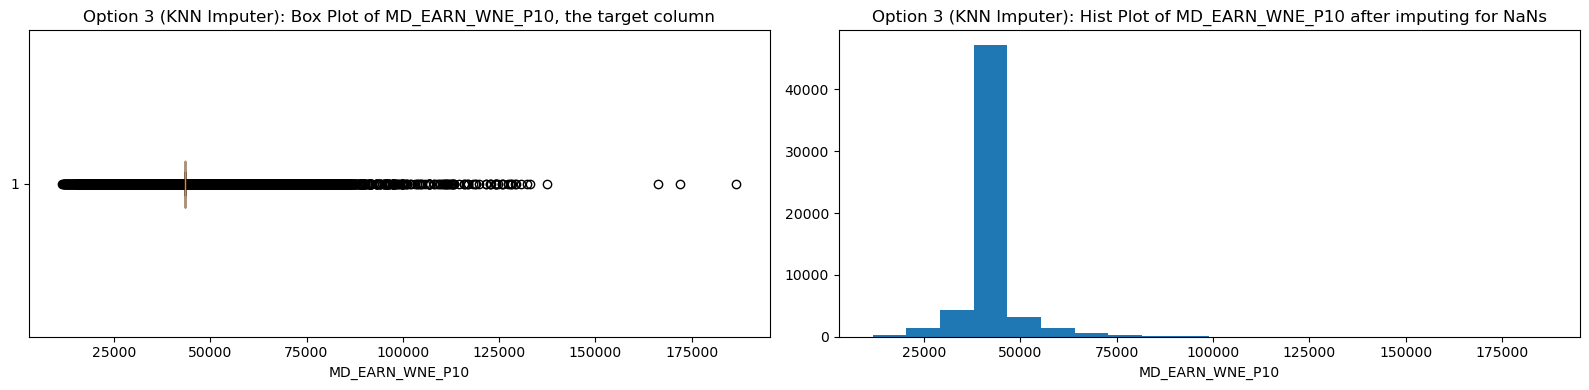

In [152]:
# Let's check the change in distribution:
import matplotlib.pyplot as plt

# Let's look at the distribution using subplots:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Box plot
column_to_plot = 'MD_EARN_WNE_P10'

option3_df[column_to_plot] = pd.to_numeric(option3_df[column_to_plot], errors='coerce')
axes[0].boxplot(option3_df[column_to_plot].dropna(), vert=False)
axes[0].set_title(f'Option 3 (KNN Imputer): Box Plot of {column_to_plot}, the target column')
axes[0].set_xlabel(column_to_plot)

# Histogram
axes[1].hist(option3_df['MD_EARN_WNE_P10'].dropna(), bins=20)
axes[1].set_title(f'Option 3 (KNN Imputer): Hist Plot of {column_to_plot} after imputing for NaNs')
axes[1].set_xlabel(column_to_plot)

# Adjust layout
plt.tight_layout()
plt.show()

KNN results in a similar distribution to the SimpleImputer with highly skewed results around the median.

As such the models carried forward to the modelling stage are:
- Option-0: Delete NaNs.
- Option-2: RFImpute (regression)

[Back to the top](#taboc)

**E.8. Summary**:
<a id = "summary"></a>

In [178]:
print(f' NaNs in Option-0: {option0_df.isna().sum().sum()}.')
print(f' NaNs in Option-2: {option2_df.isna().sum().sum()}.')

 NaNs in Option-0: 0.
 NaNs in Option-2: 0.


The two options are now ready for further analysis and processing in the next notebook. The dataframes will be stored so that it can be retrieved in other notebooks.

In [179]:
cleaned_option0_BL_df=option0_df.copy()
cleaned_option2_RFI_df=option2_df.copy()

In [180]:
# Storing dataframe so that it can be used in other noteobooks within the Capstone project:
 
%store cleaned_option0_BL_df
%store cleaned_option2_RFI_df

Stored 'cleaned_option0_BL_df' (DataFrame)
Stored 'cleaned_option2_RFI_df' (DataFrame)


[Back to the top](#taboc)

## <font color=maroon>Nice to haves:</font><a id = "NextSteps"></a>

- Calculate the Grad debt (target variable) using the time-series method.
- for the 680 NaNs dropped for Lat/Lons due to time constraints - lookup the locations using the Google GeoCode API and use them in the dataframe.
- Consdider alternate Imputing methods to SimpleImpute for the remaining columns.
- Furhter data mining from external sources to fill in the "Privacy Suppressed" and NaN values.

[Back to the top](#TableOC)

## <font color=maroon>References</font><a id = "ReferenceList"></a>

<a id = "Ref1"></a>[[1]](#Data):  "*Data Home: Download the data*", v.Oct 2023, College Scorecard, US Dept. of Education, (https://collegescorecard.ed.gov/data/), last viewed: 10 Nov 2023.

<a id = "Ref2"></a> [[2]](#DataDictionary): "*View Glossary*", IPEDS 2023-24 Data Collection System, (https://surveys.nces.ed.gov/ipeds/public/glossary), last viewed: 10 Nov 2023.

<a id = "Ref3"></a> [[3]](#DataDictionary): "*Data Documentation*", v.Oct 2023, College Scorecard, US Dept. of Education, (https://collegescorecard.ed.gov/data/documentation/), last viewed: 10 Nov 2023.

<a id = "ref4"></a> [[4]](#imputemethods):   Van Buuren, Stef, "*Flexible Imputation of Missing Data*", Second Ed. (2018), Chapman and Hall/CRC, New York, doi: https://doi.org/10.1201/9780429492259

[Back to the top](#tableoc)